In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from tqdm import tqdm

sns.set()

In [2]:
def load_data(path):
    df = pd.read_csv(path+'/labeledfeatures.csv')
    df = df[~df['EventType'].isna()]
    return df

paths = [f'./Data/In-lab/{i}' for i in os.listdir('./Data/In-lab/')]

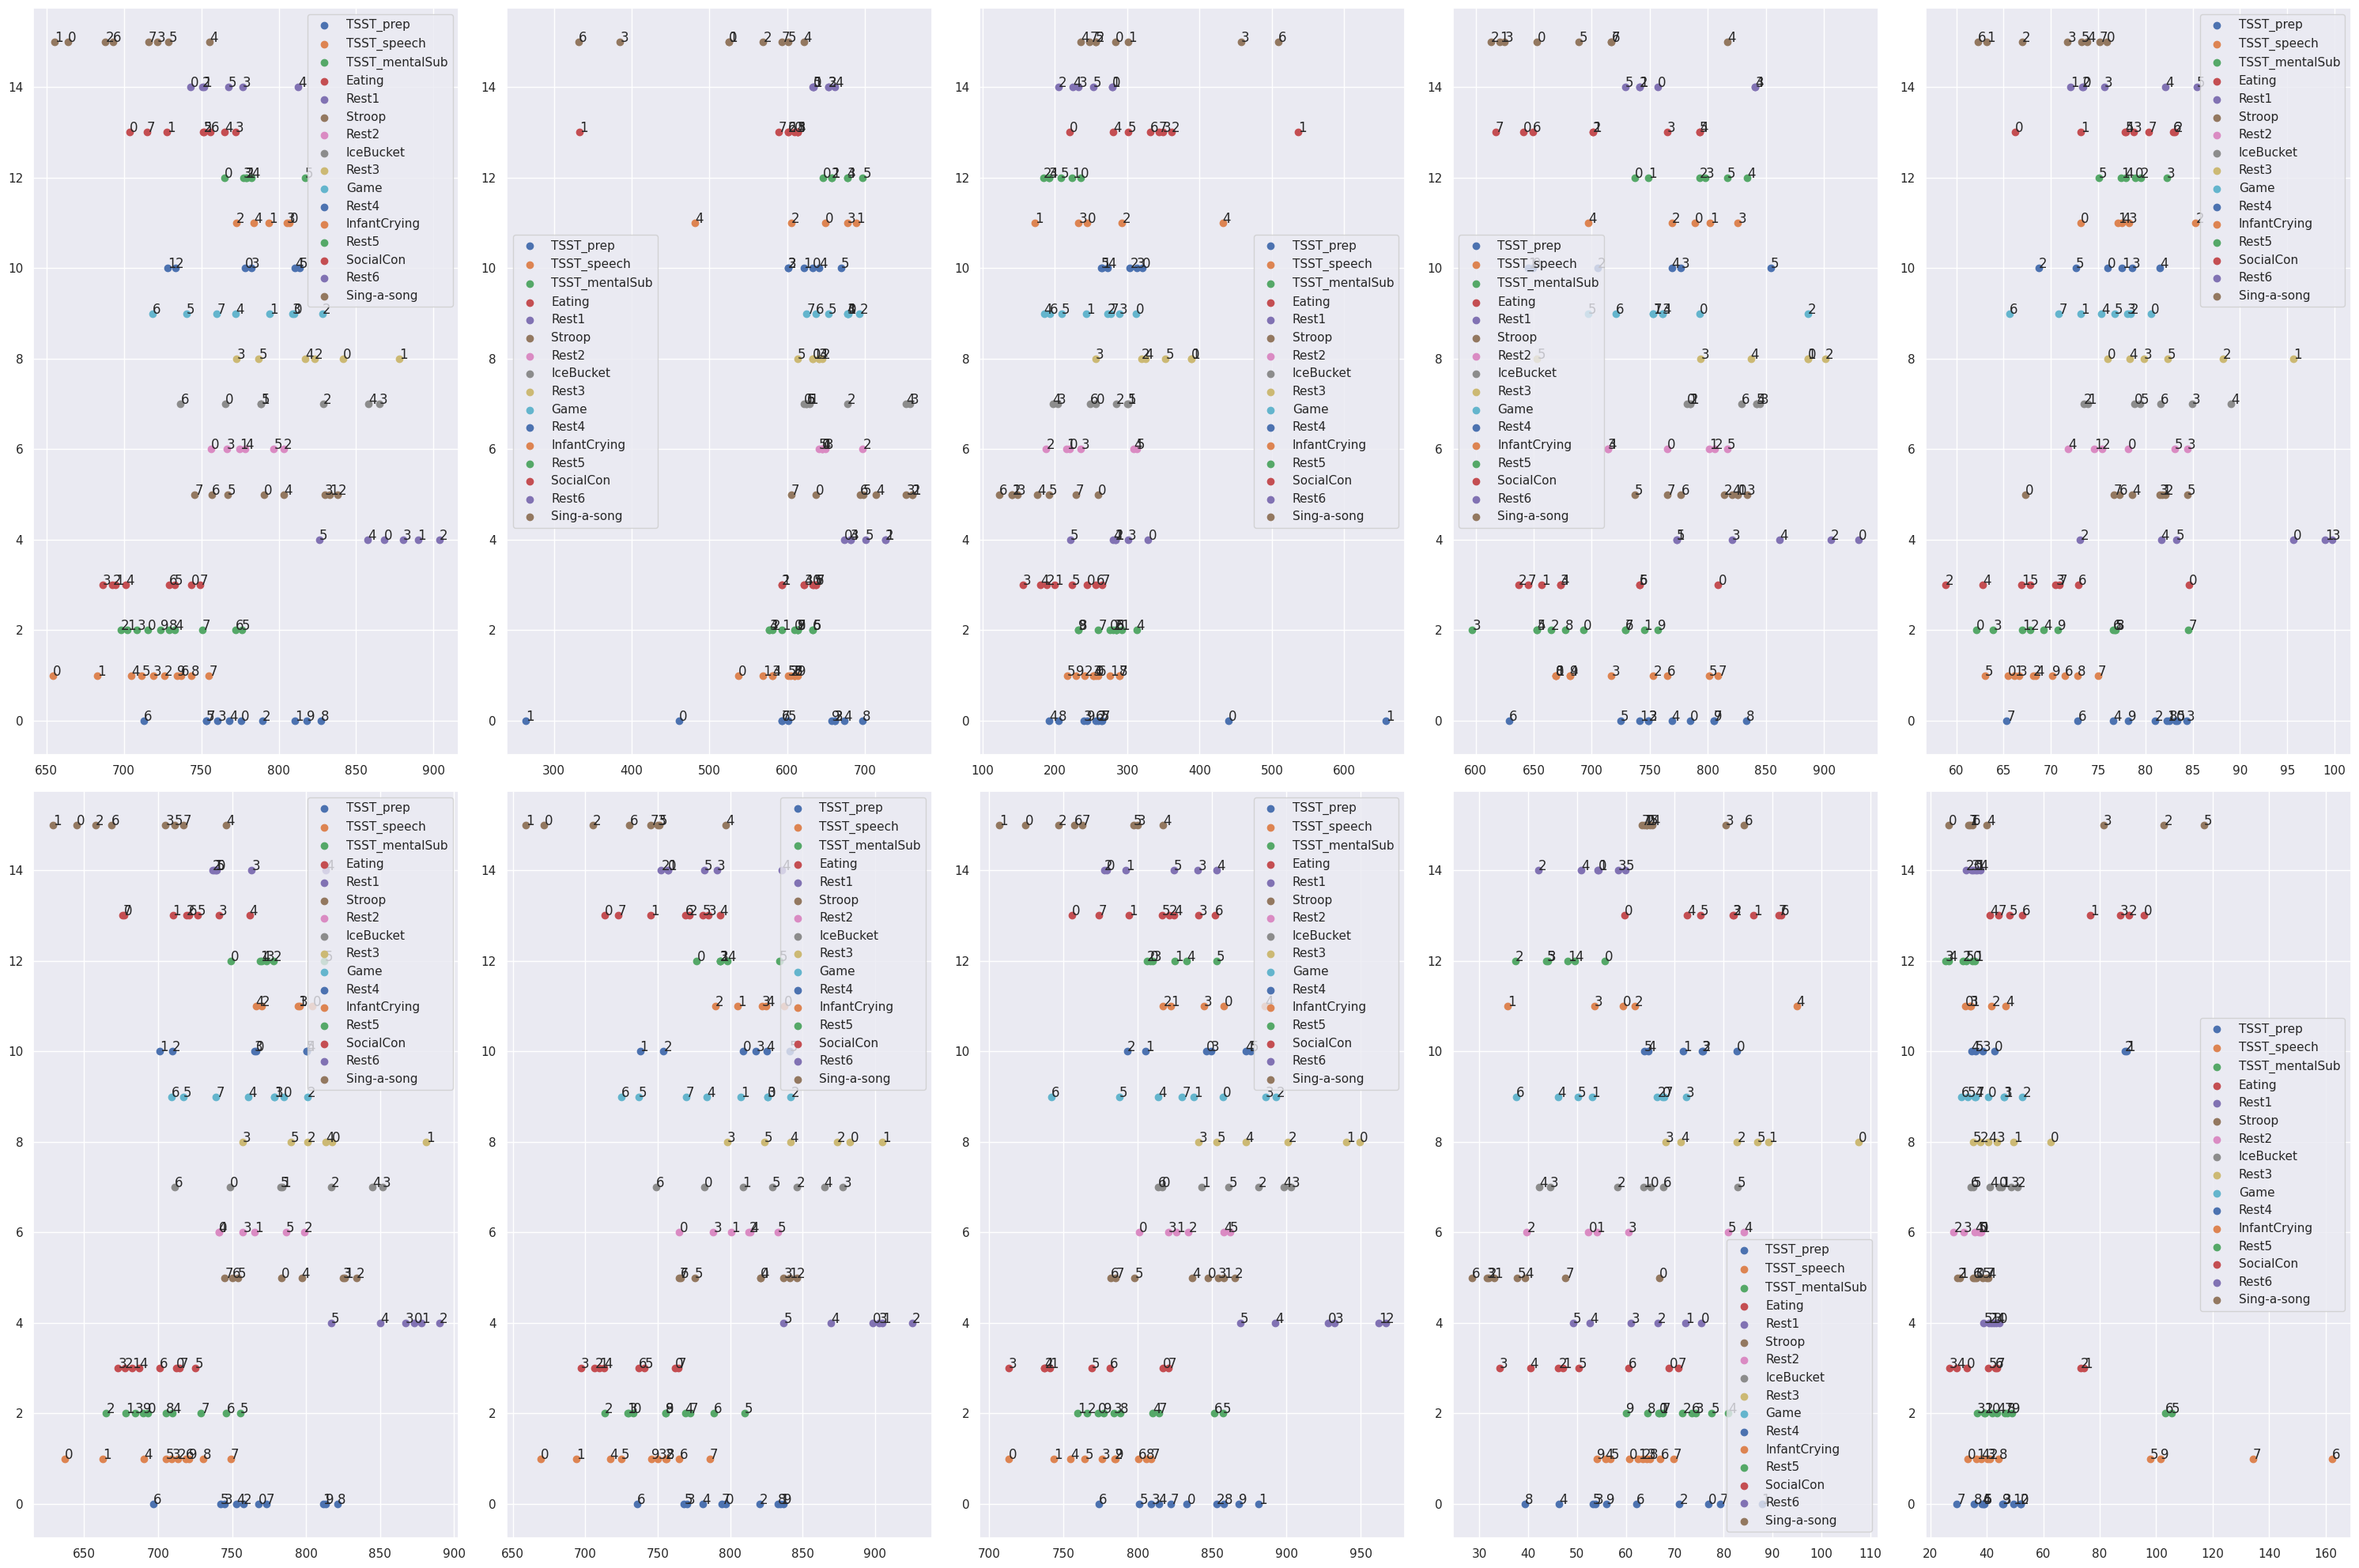

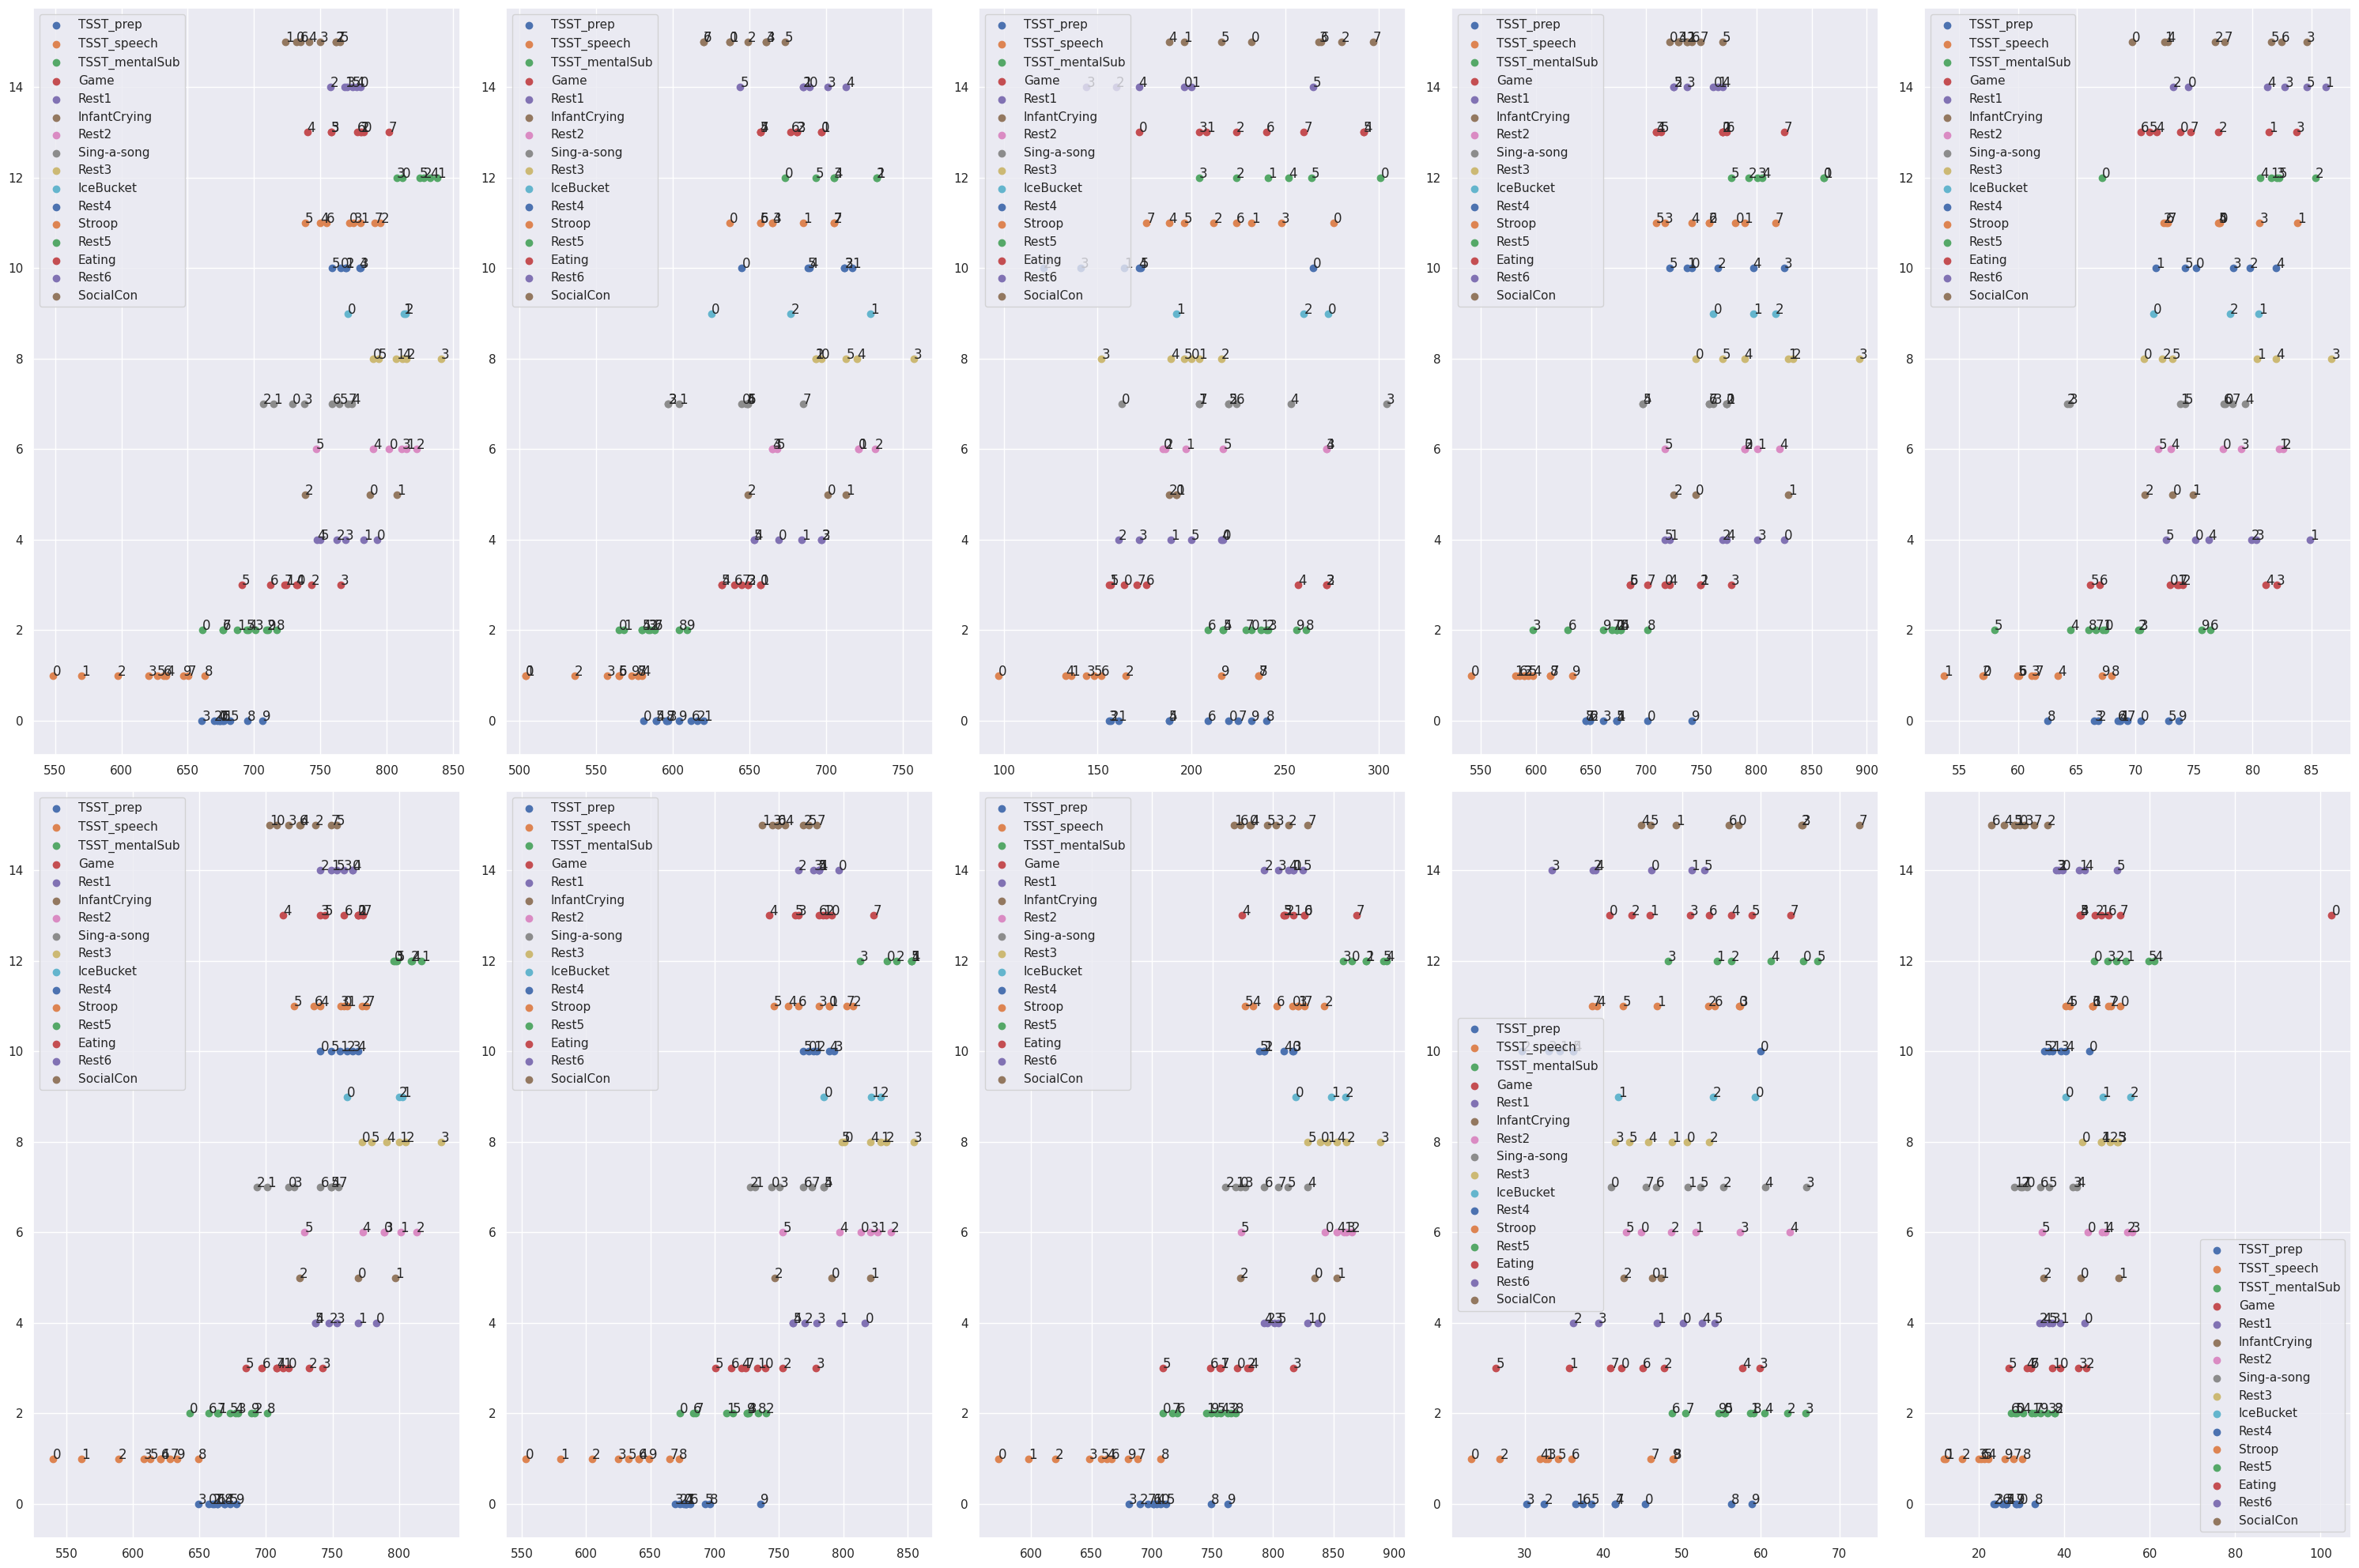

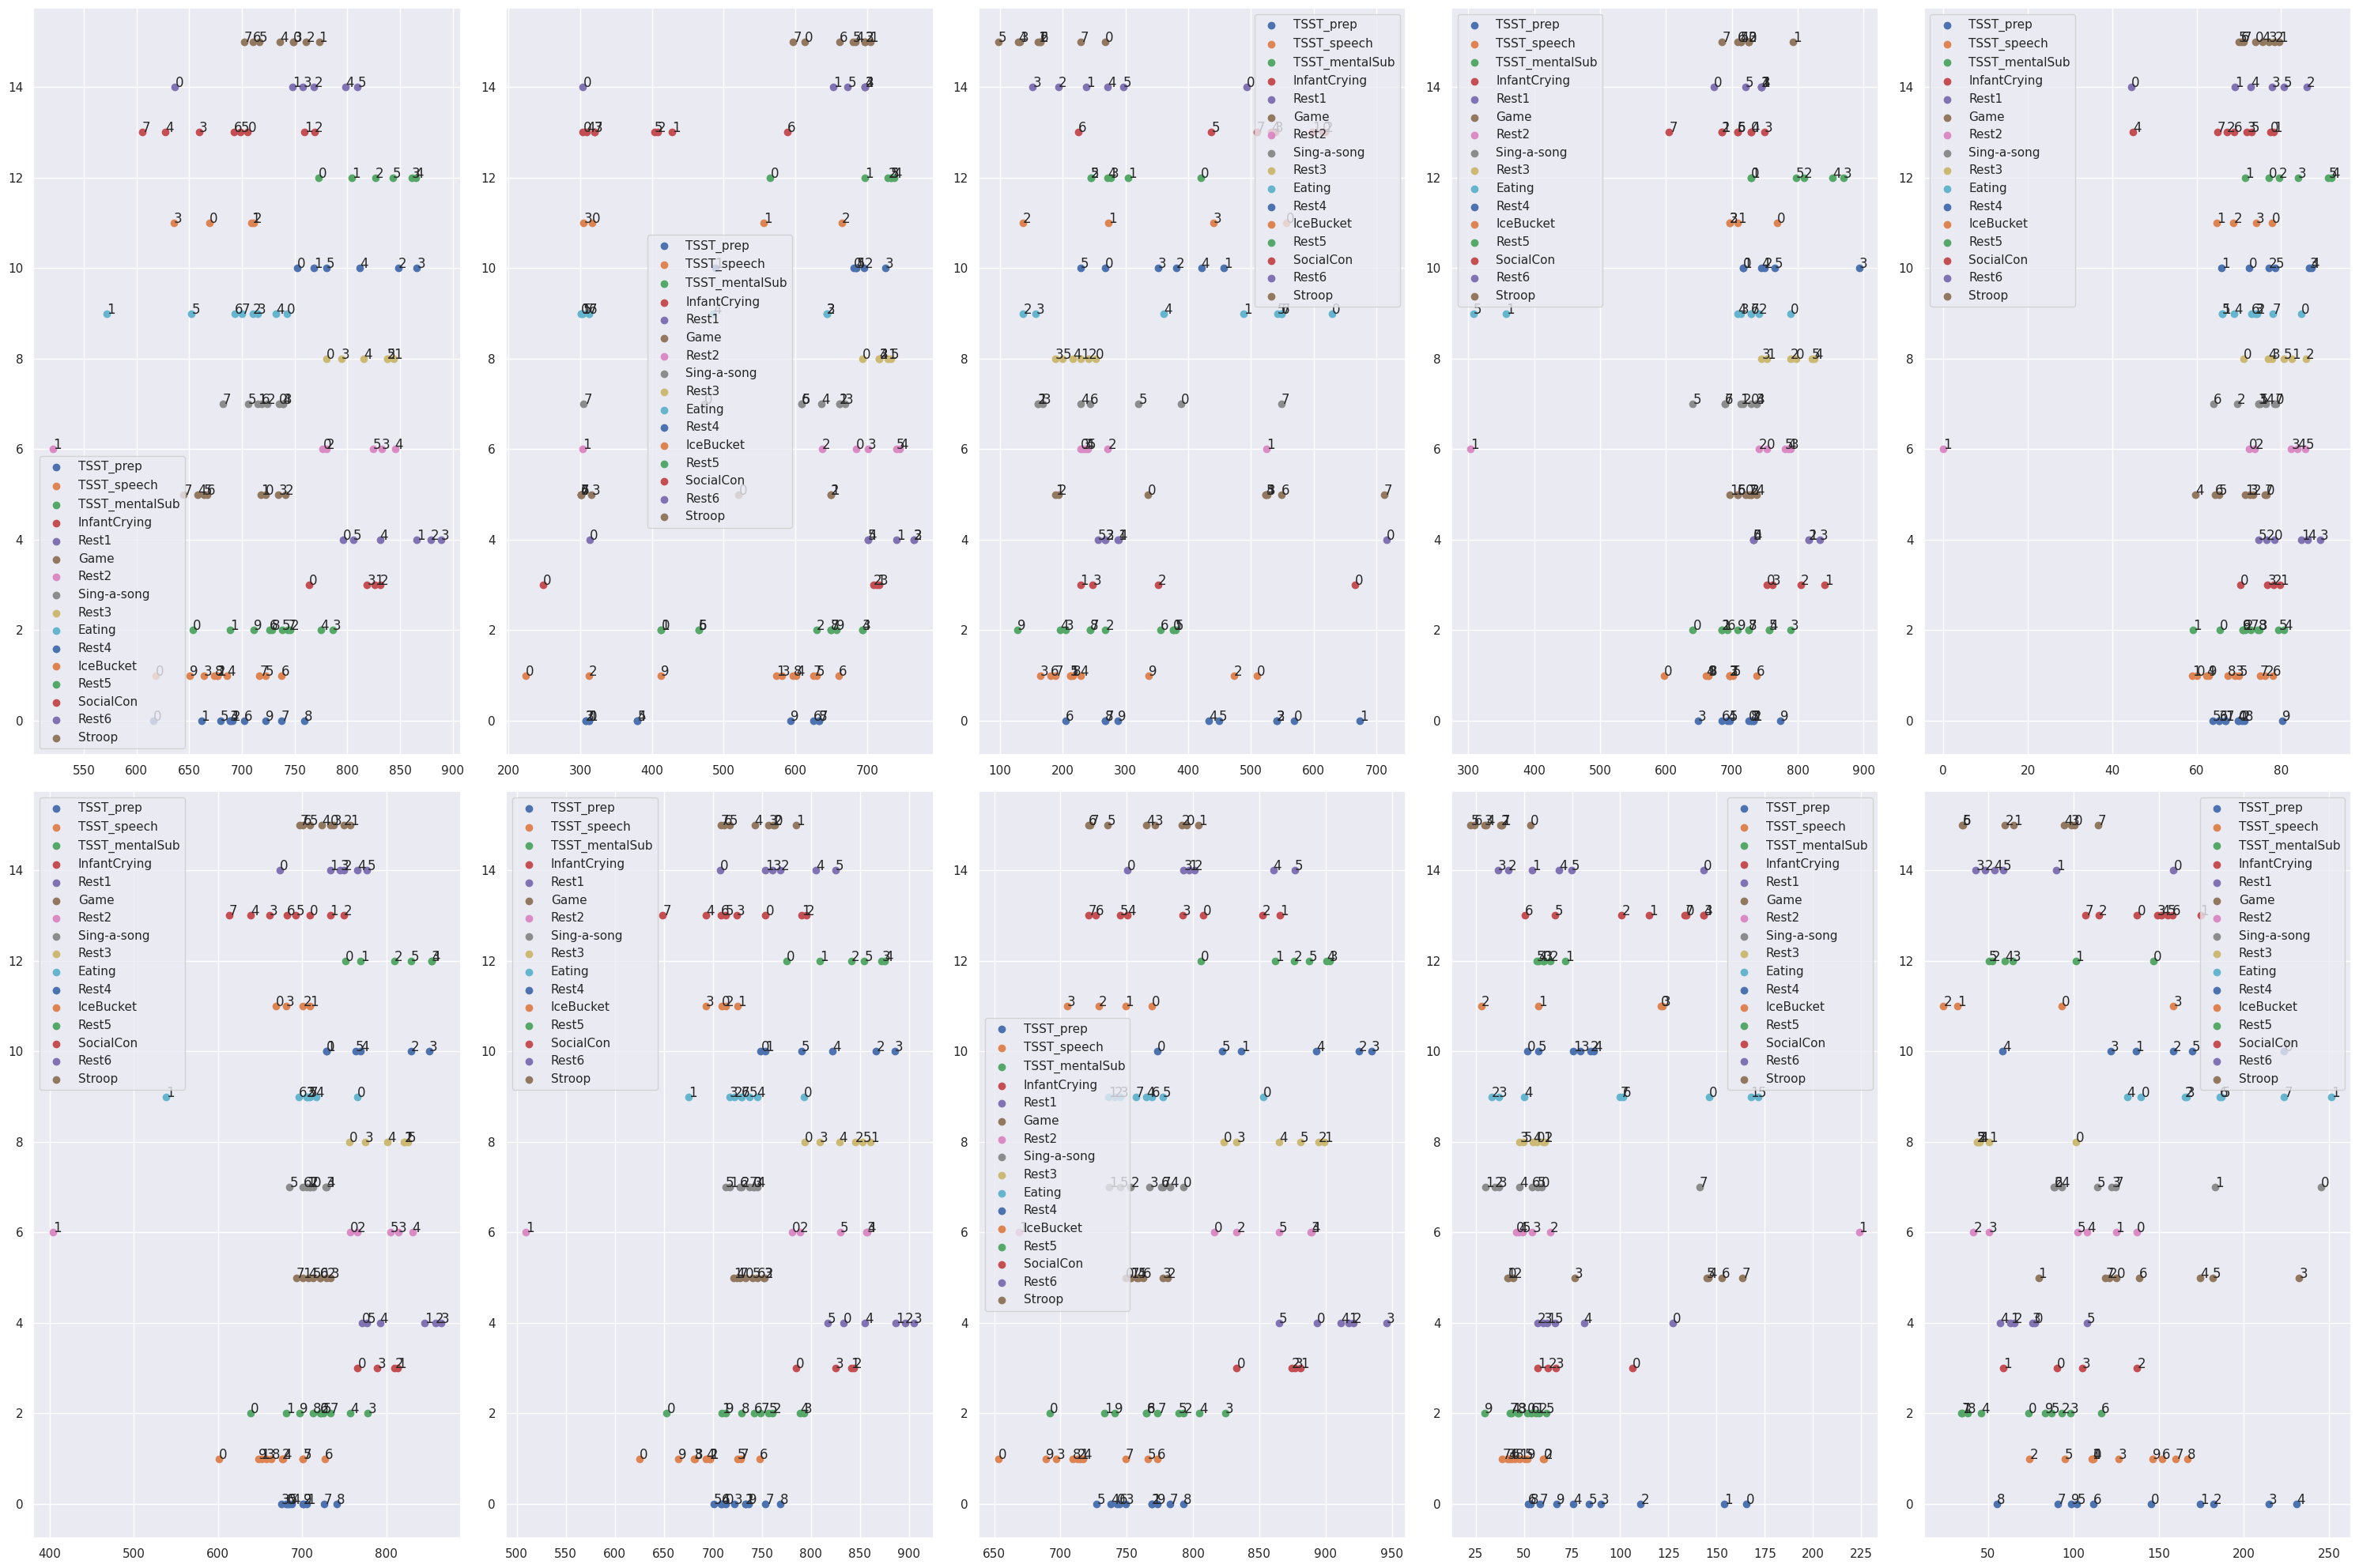

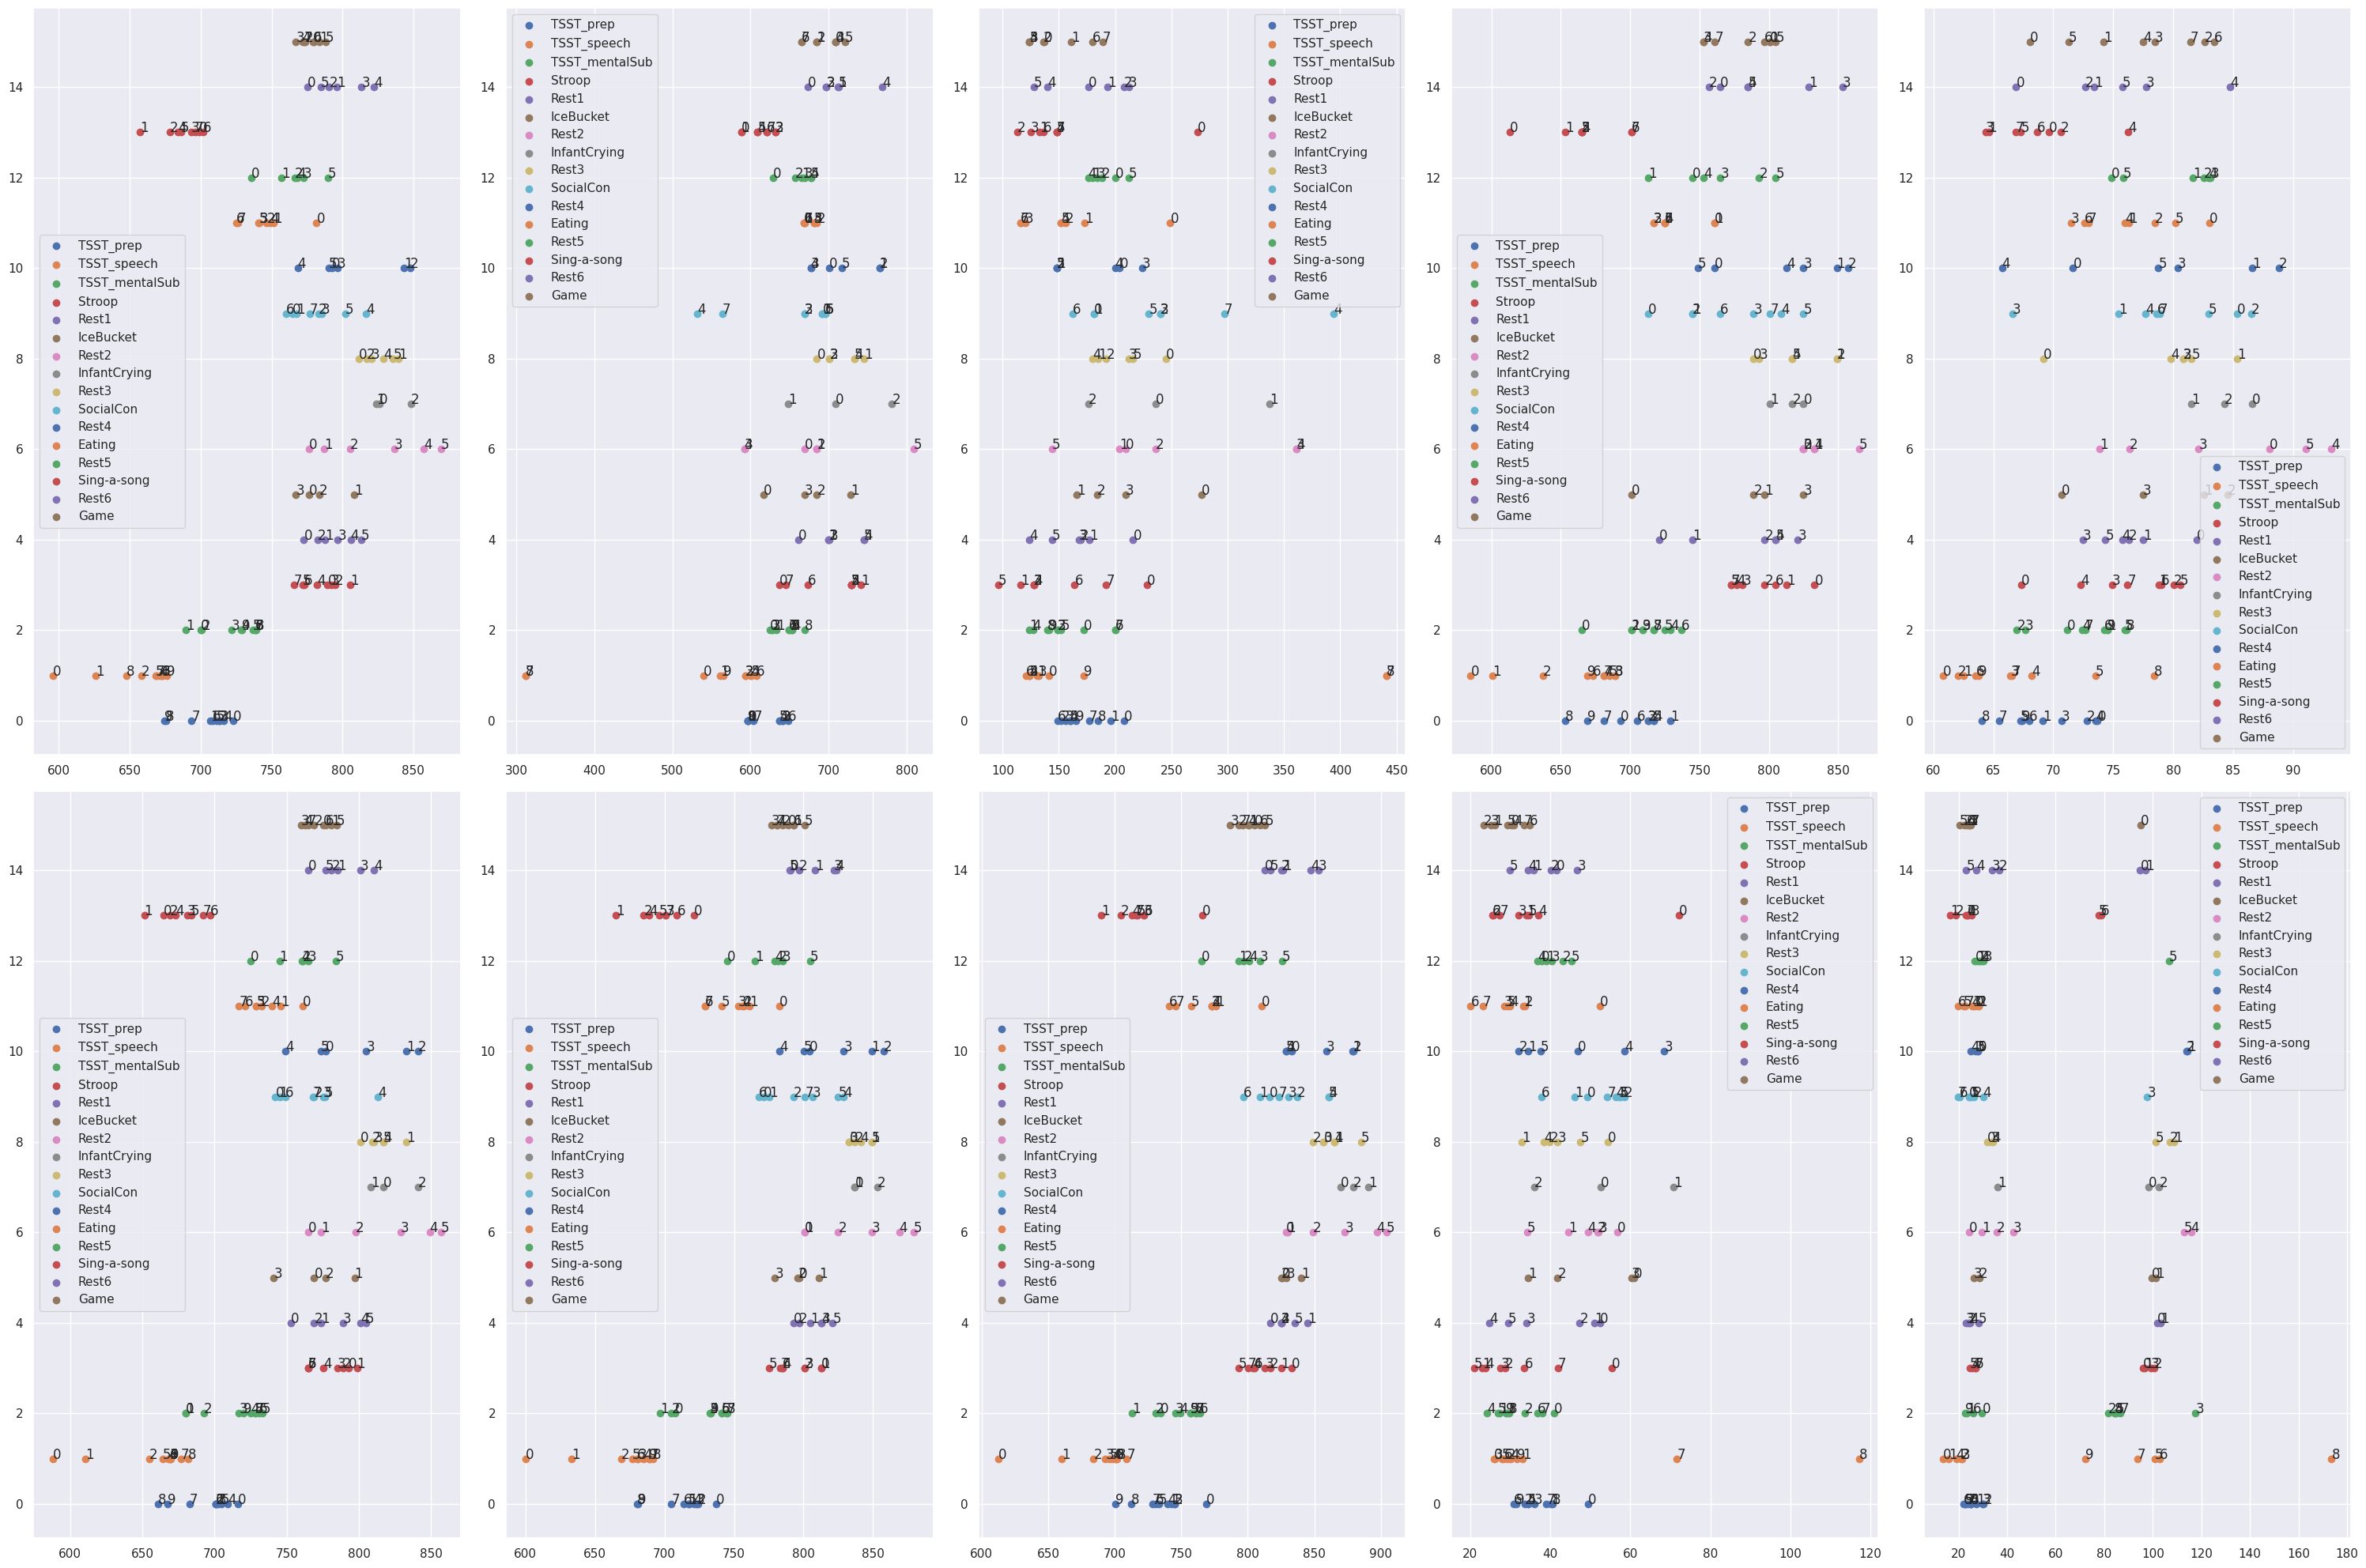

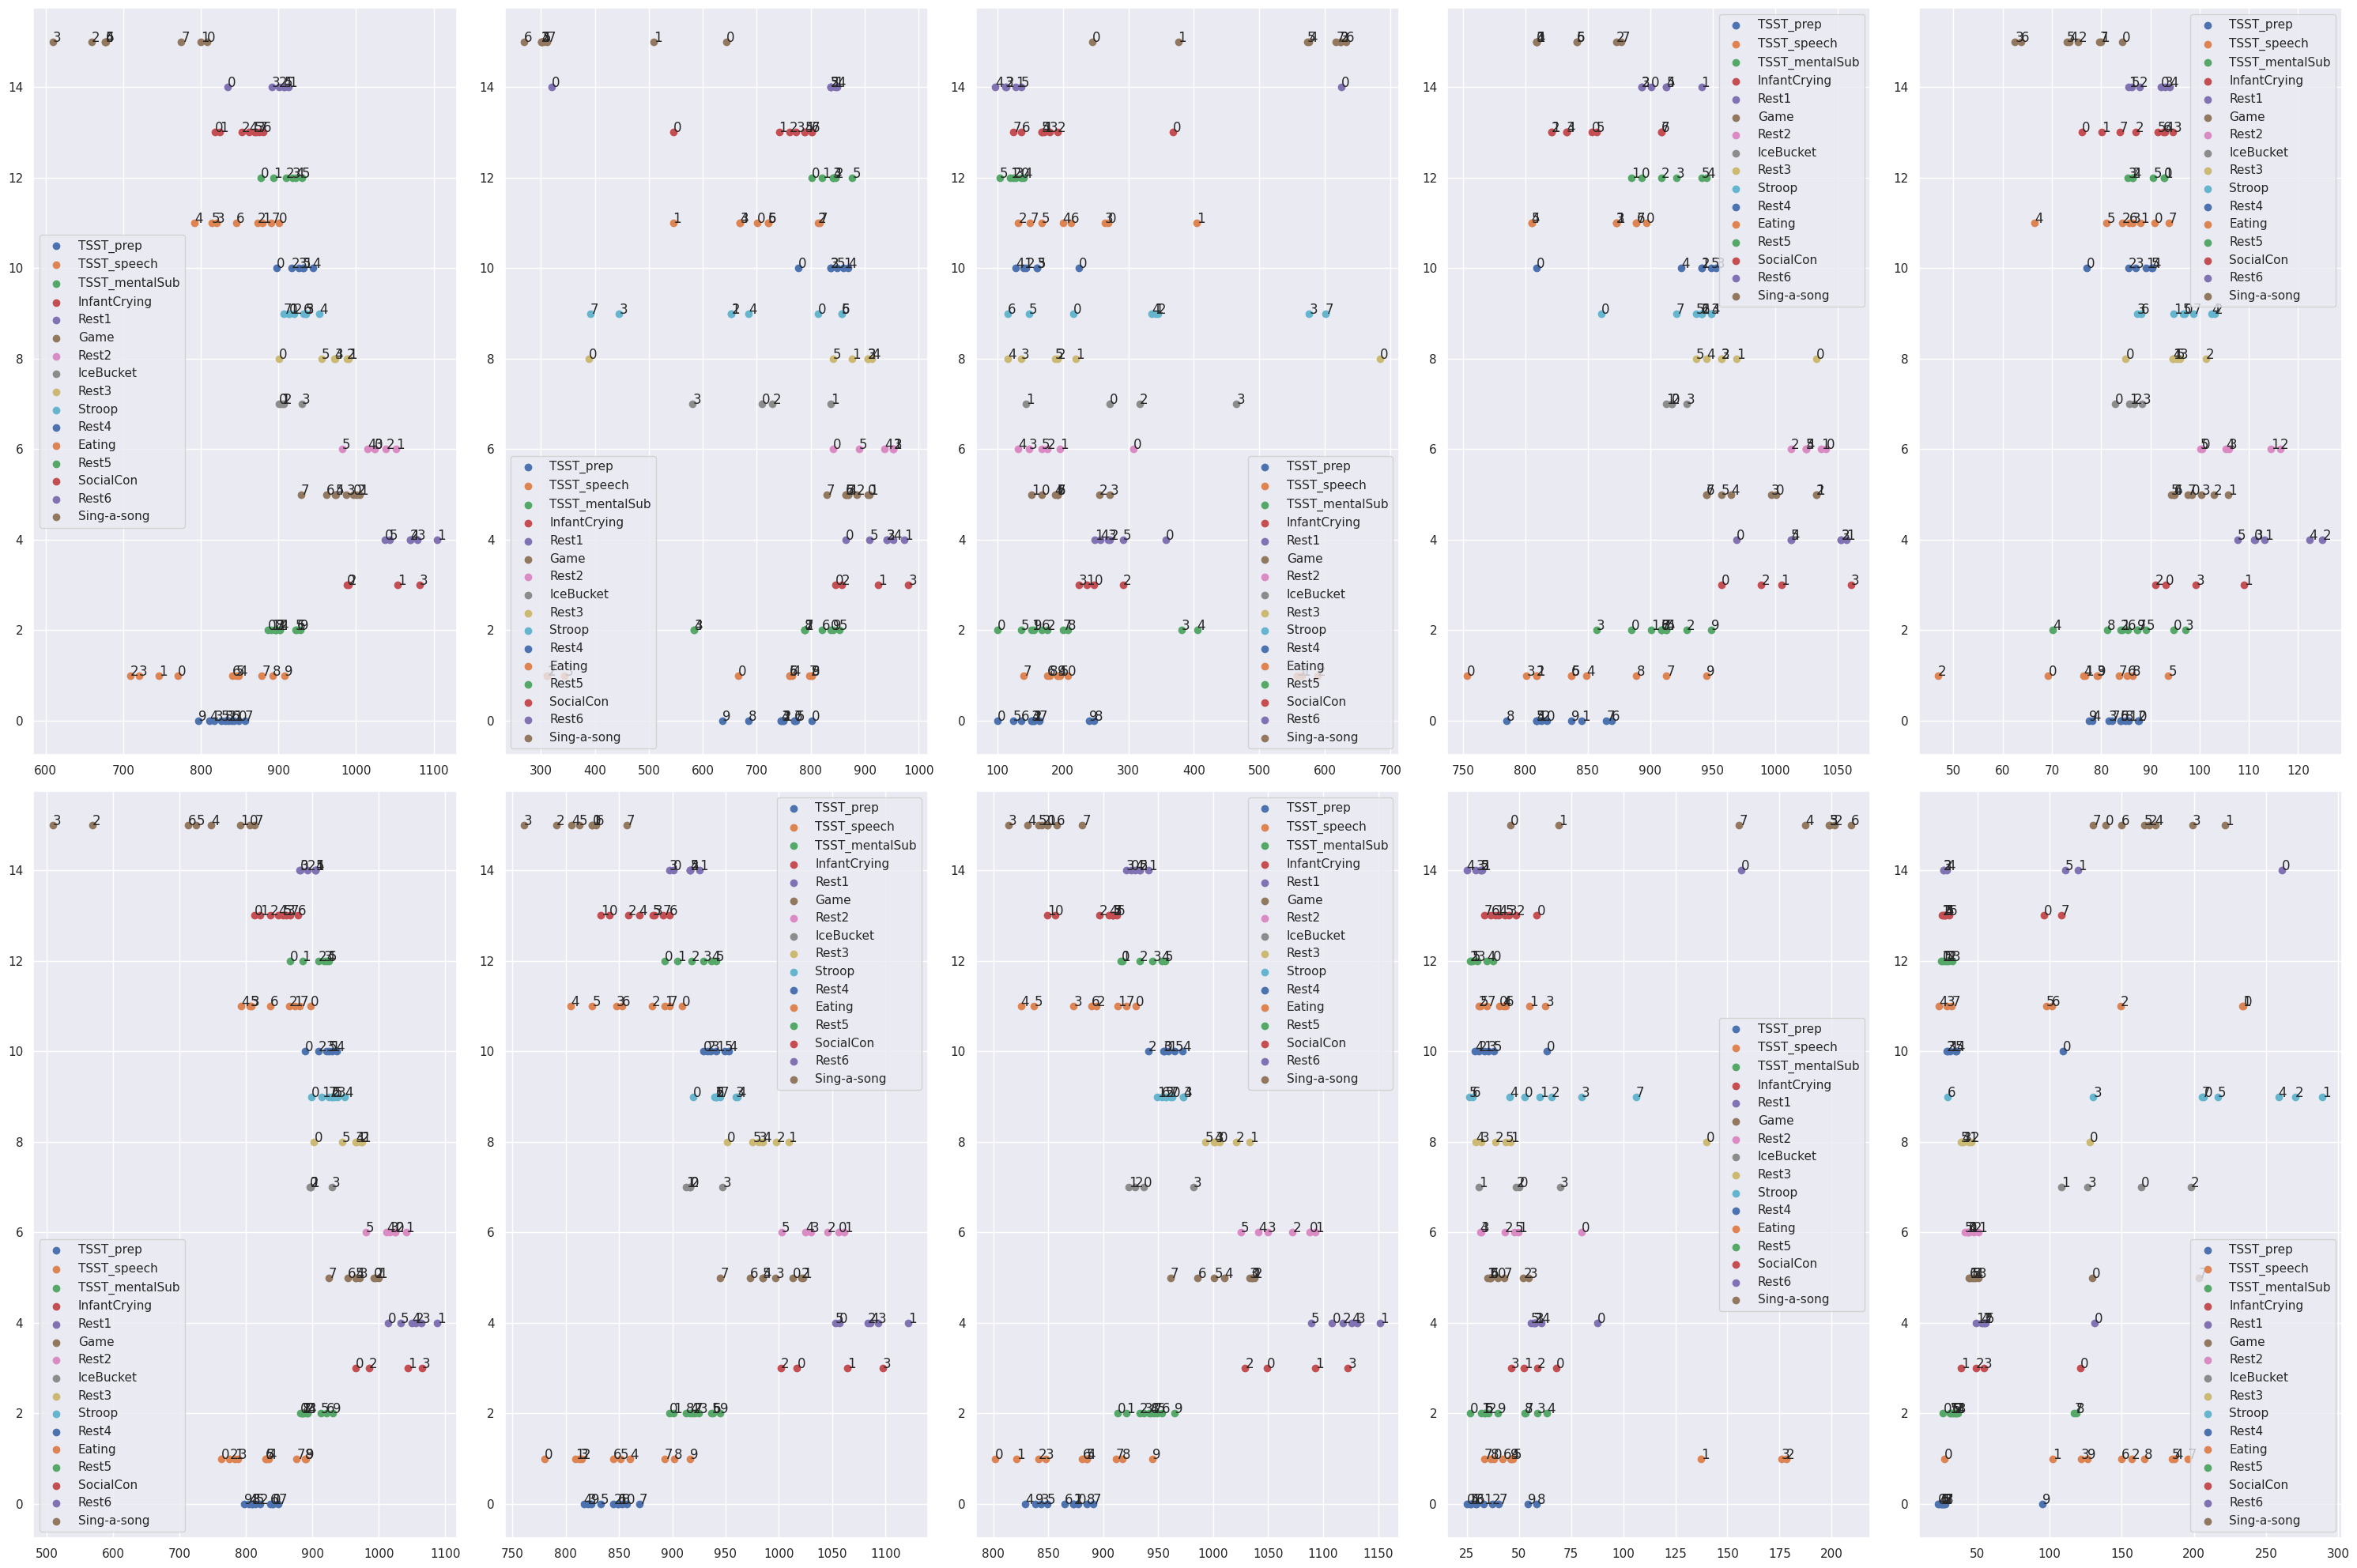

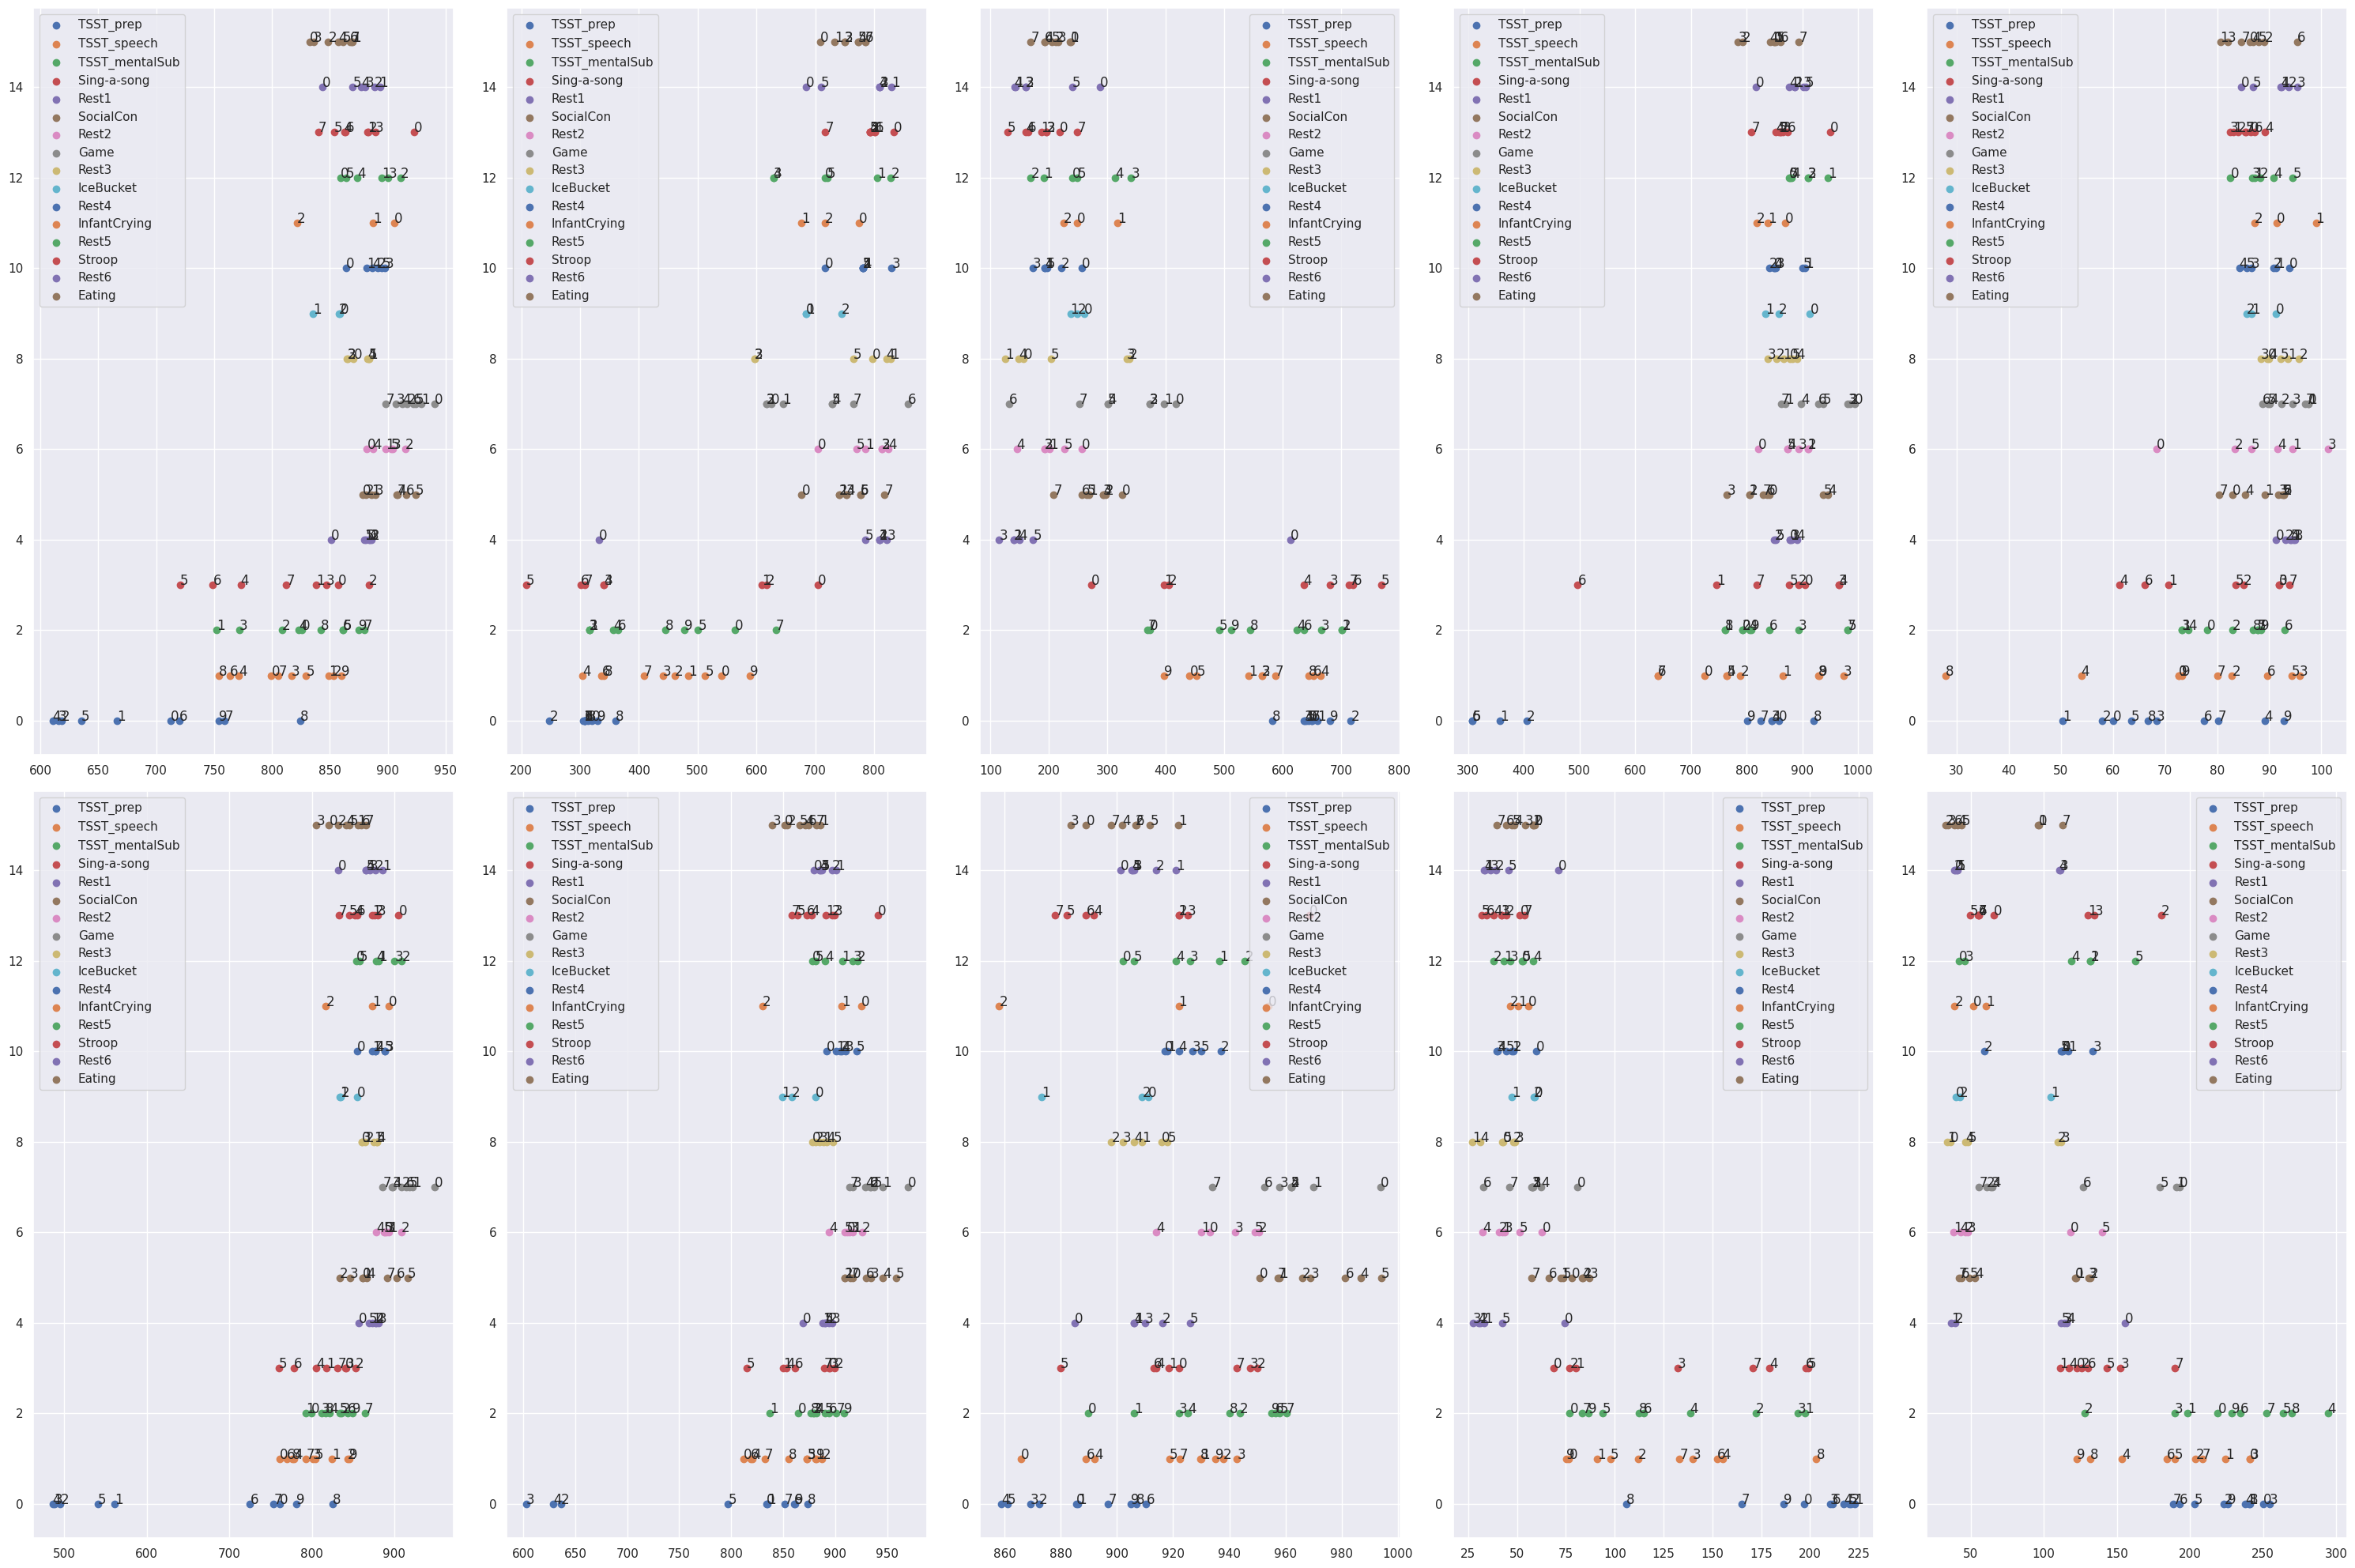

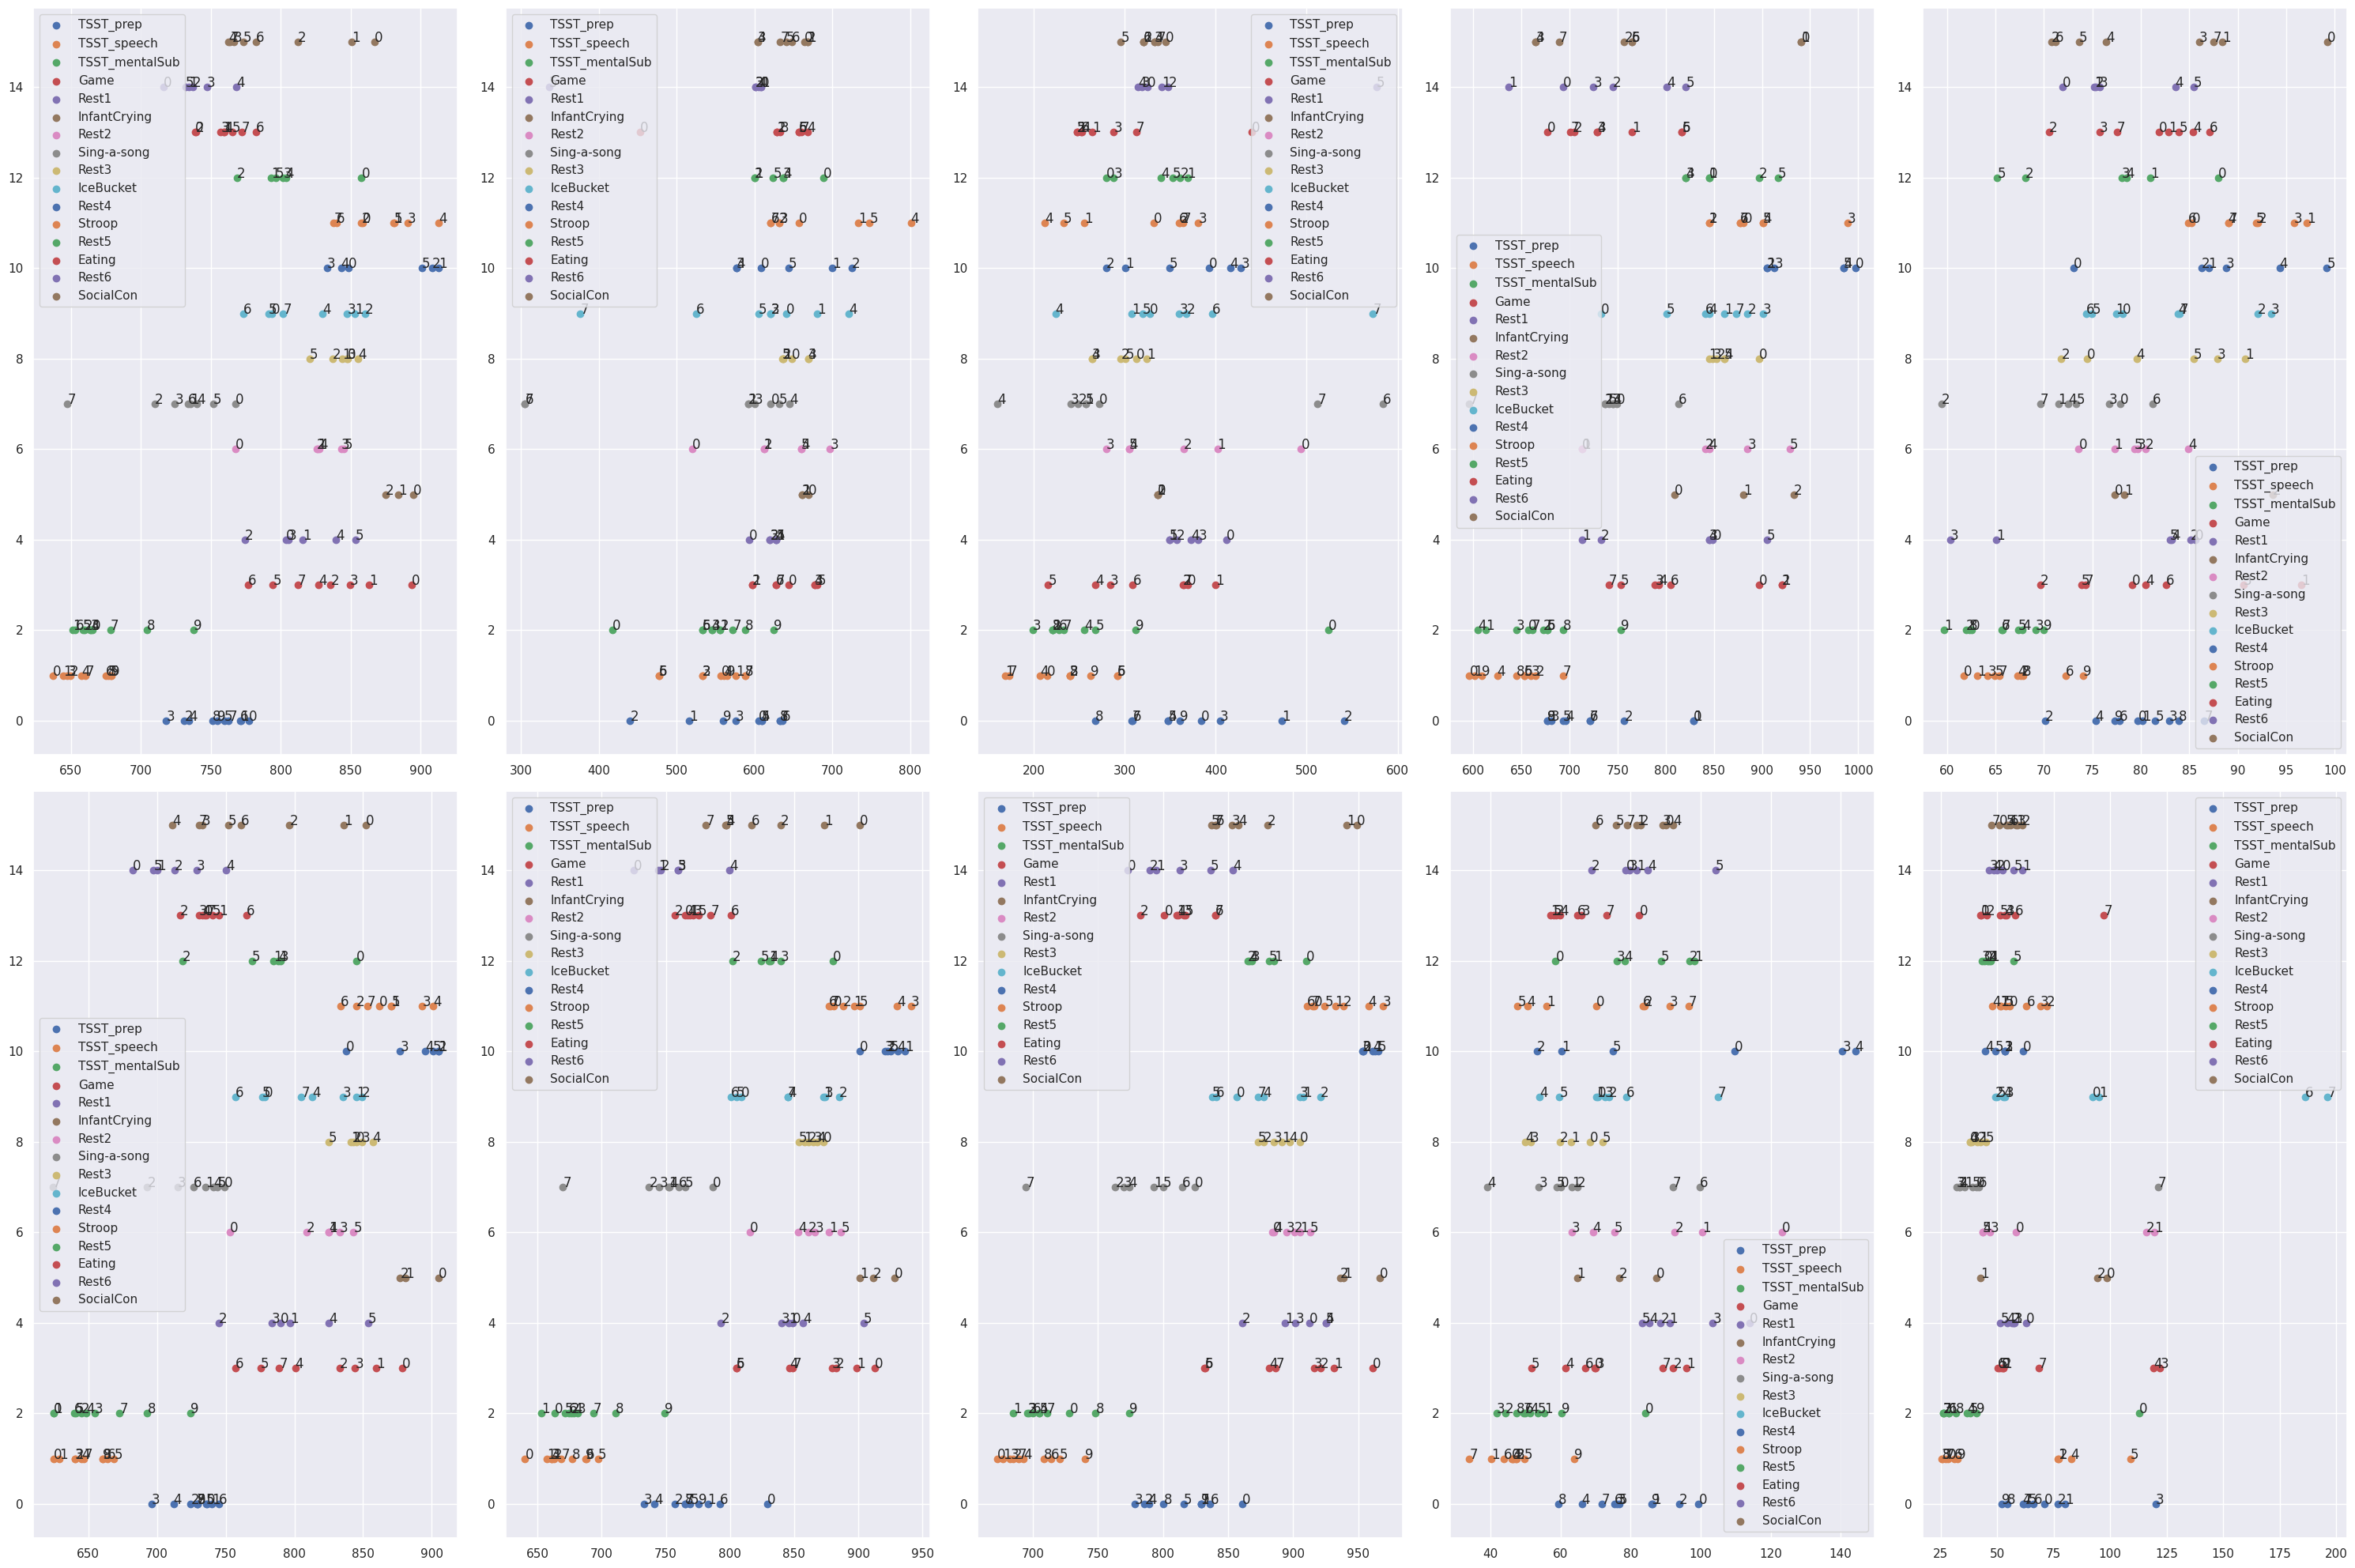

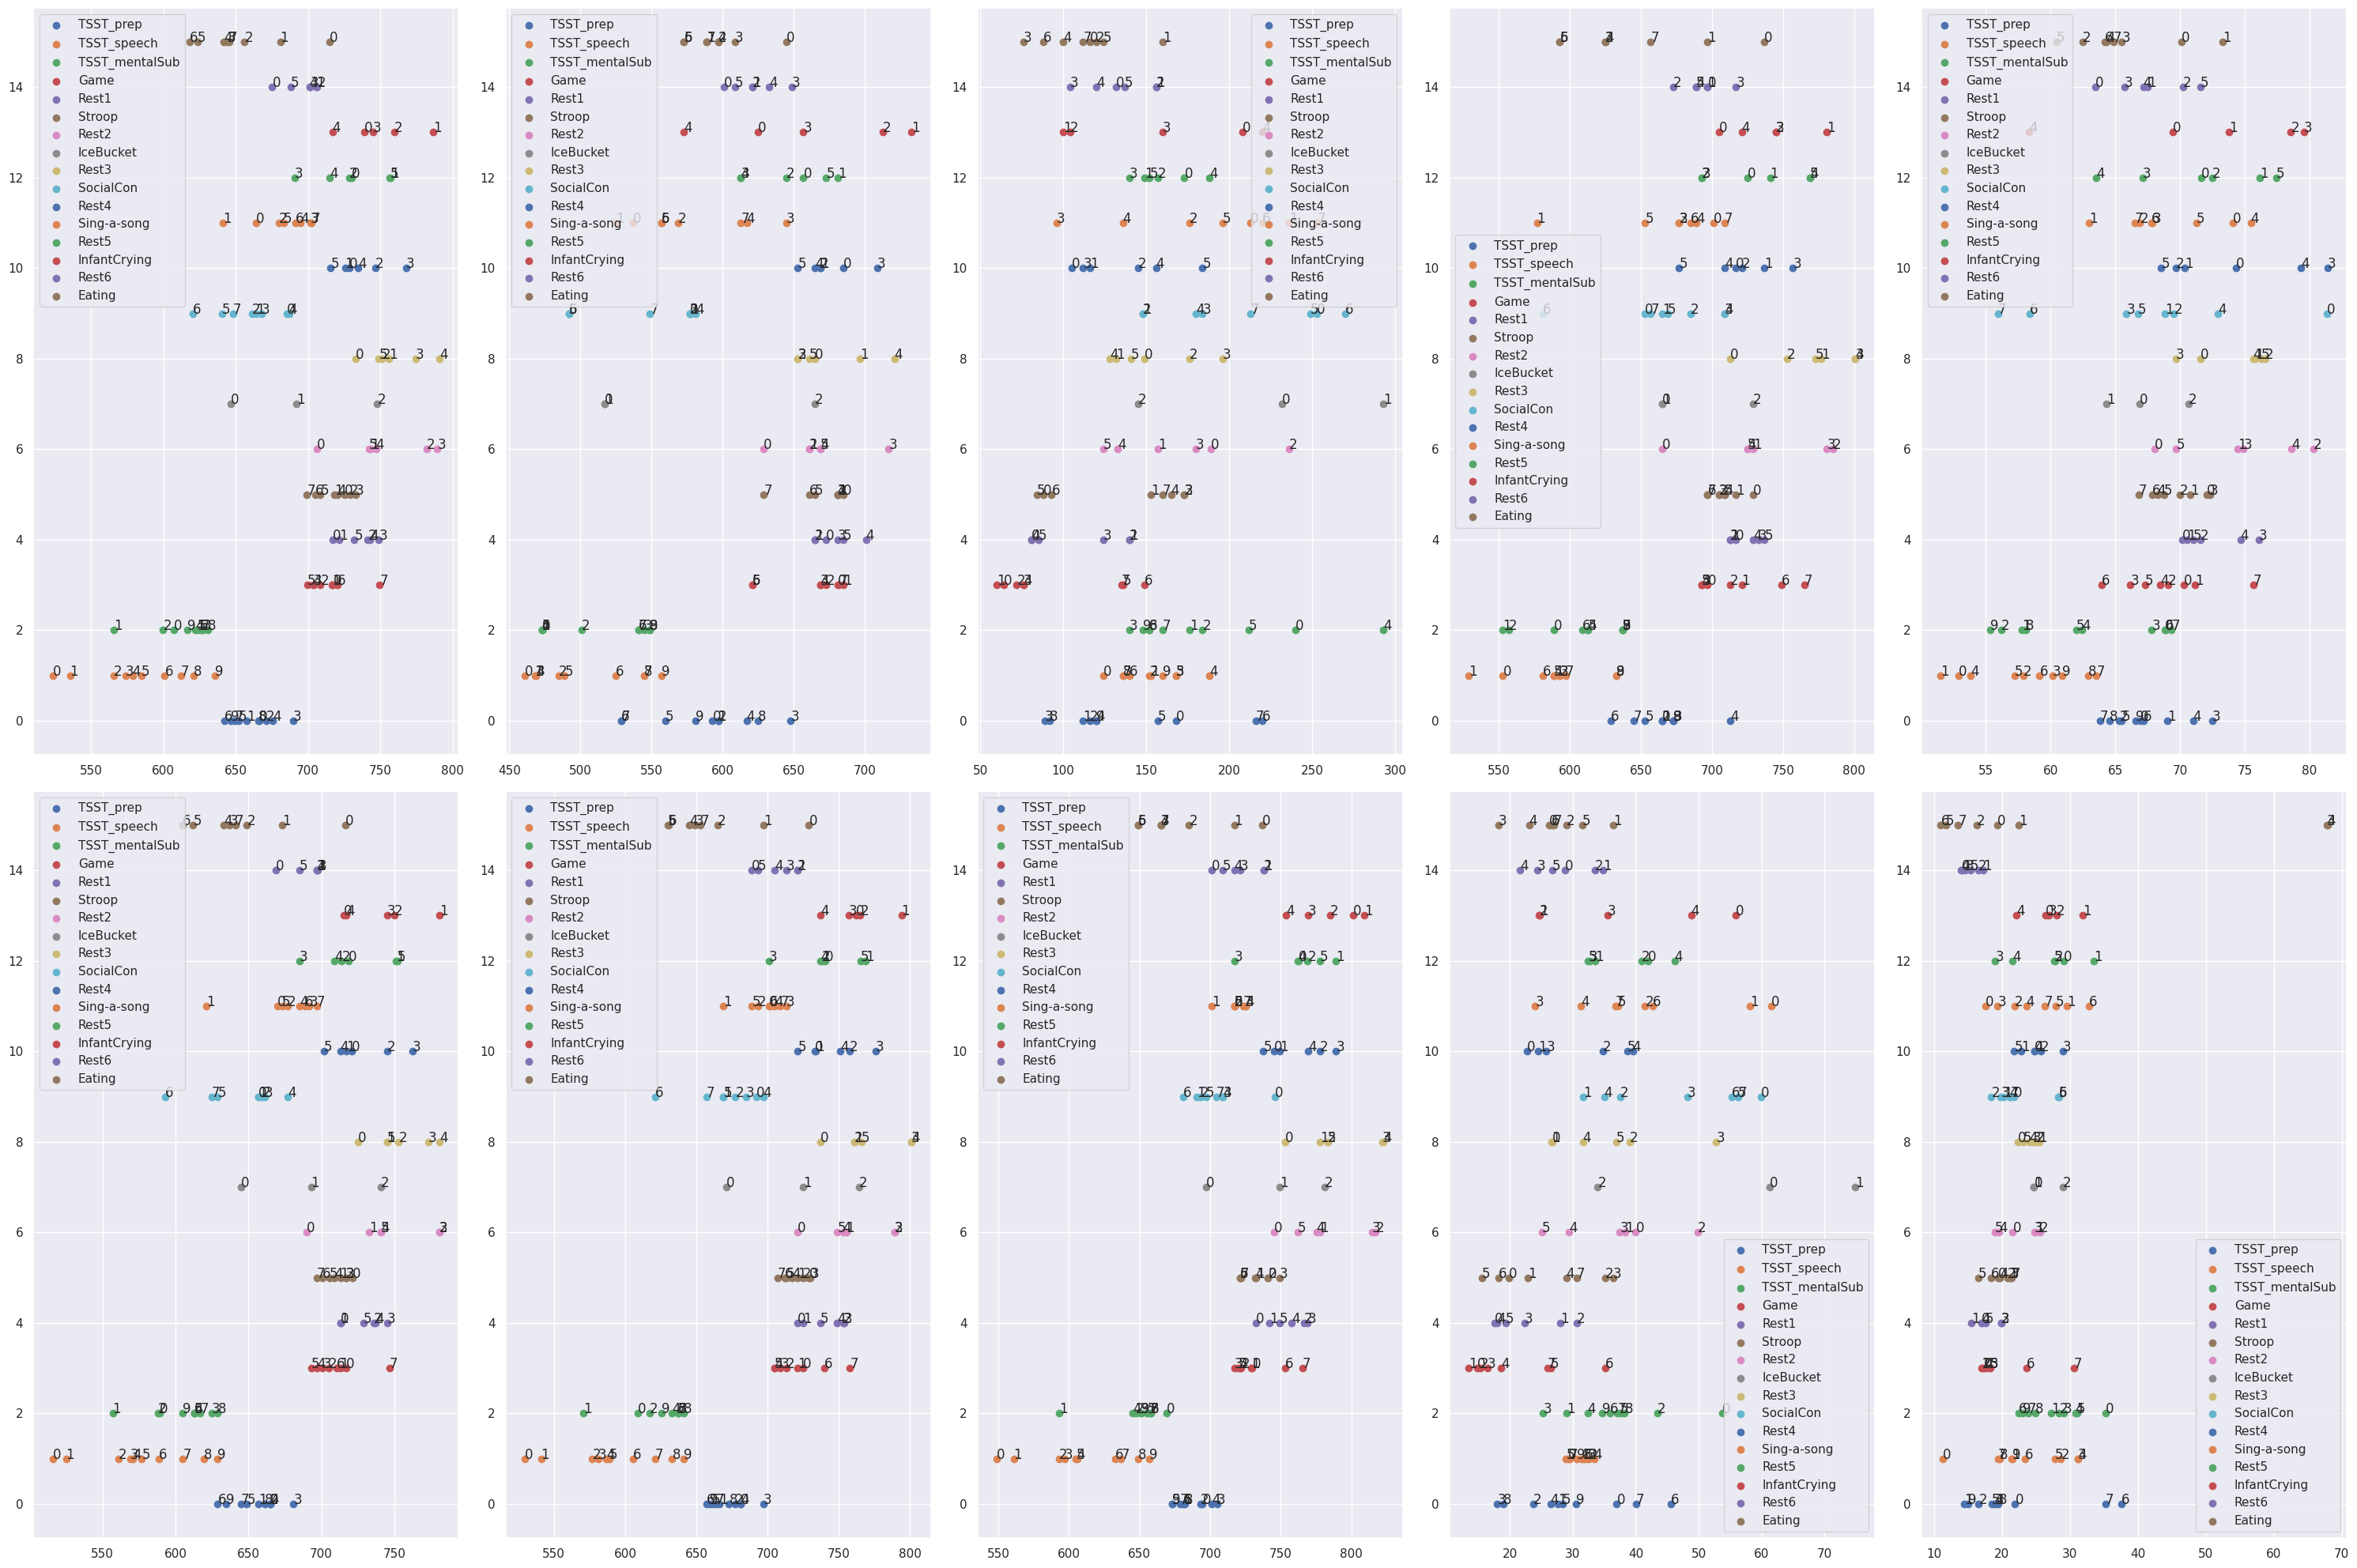

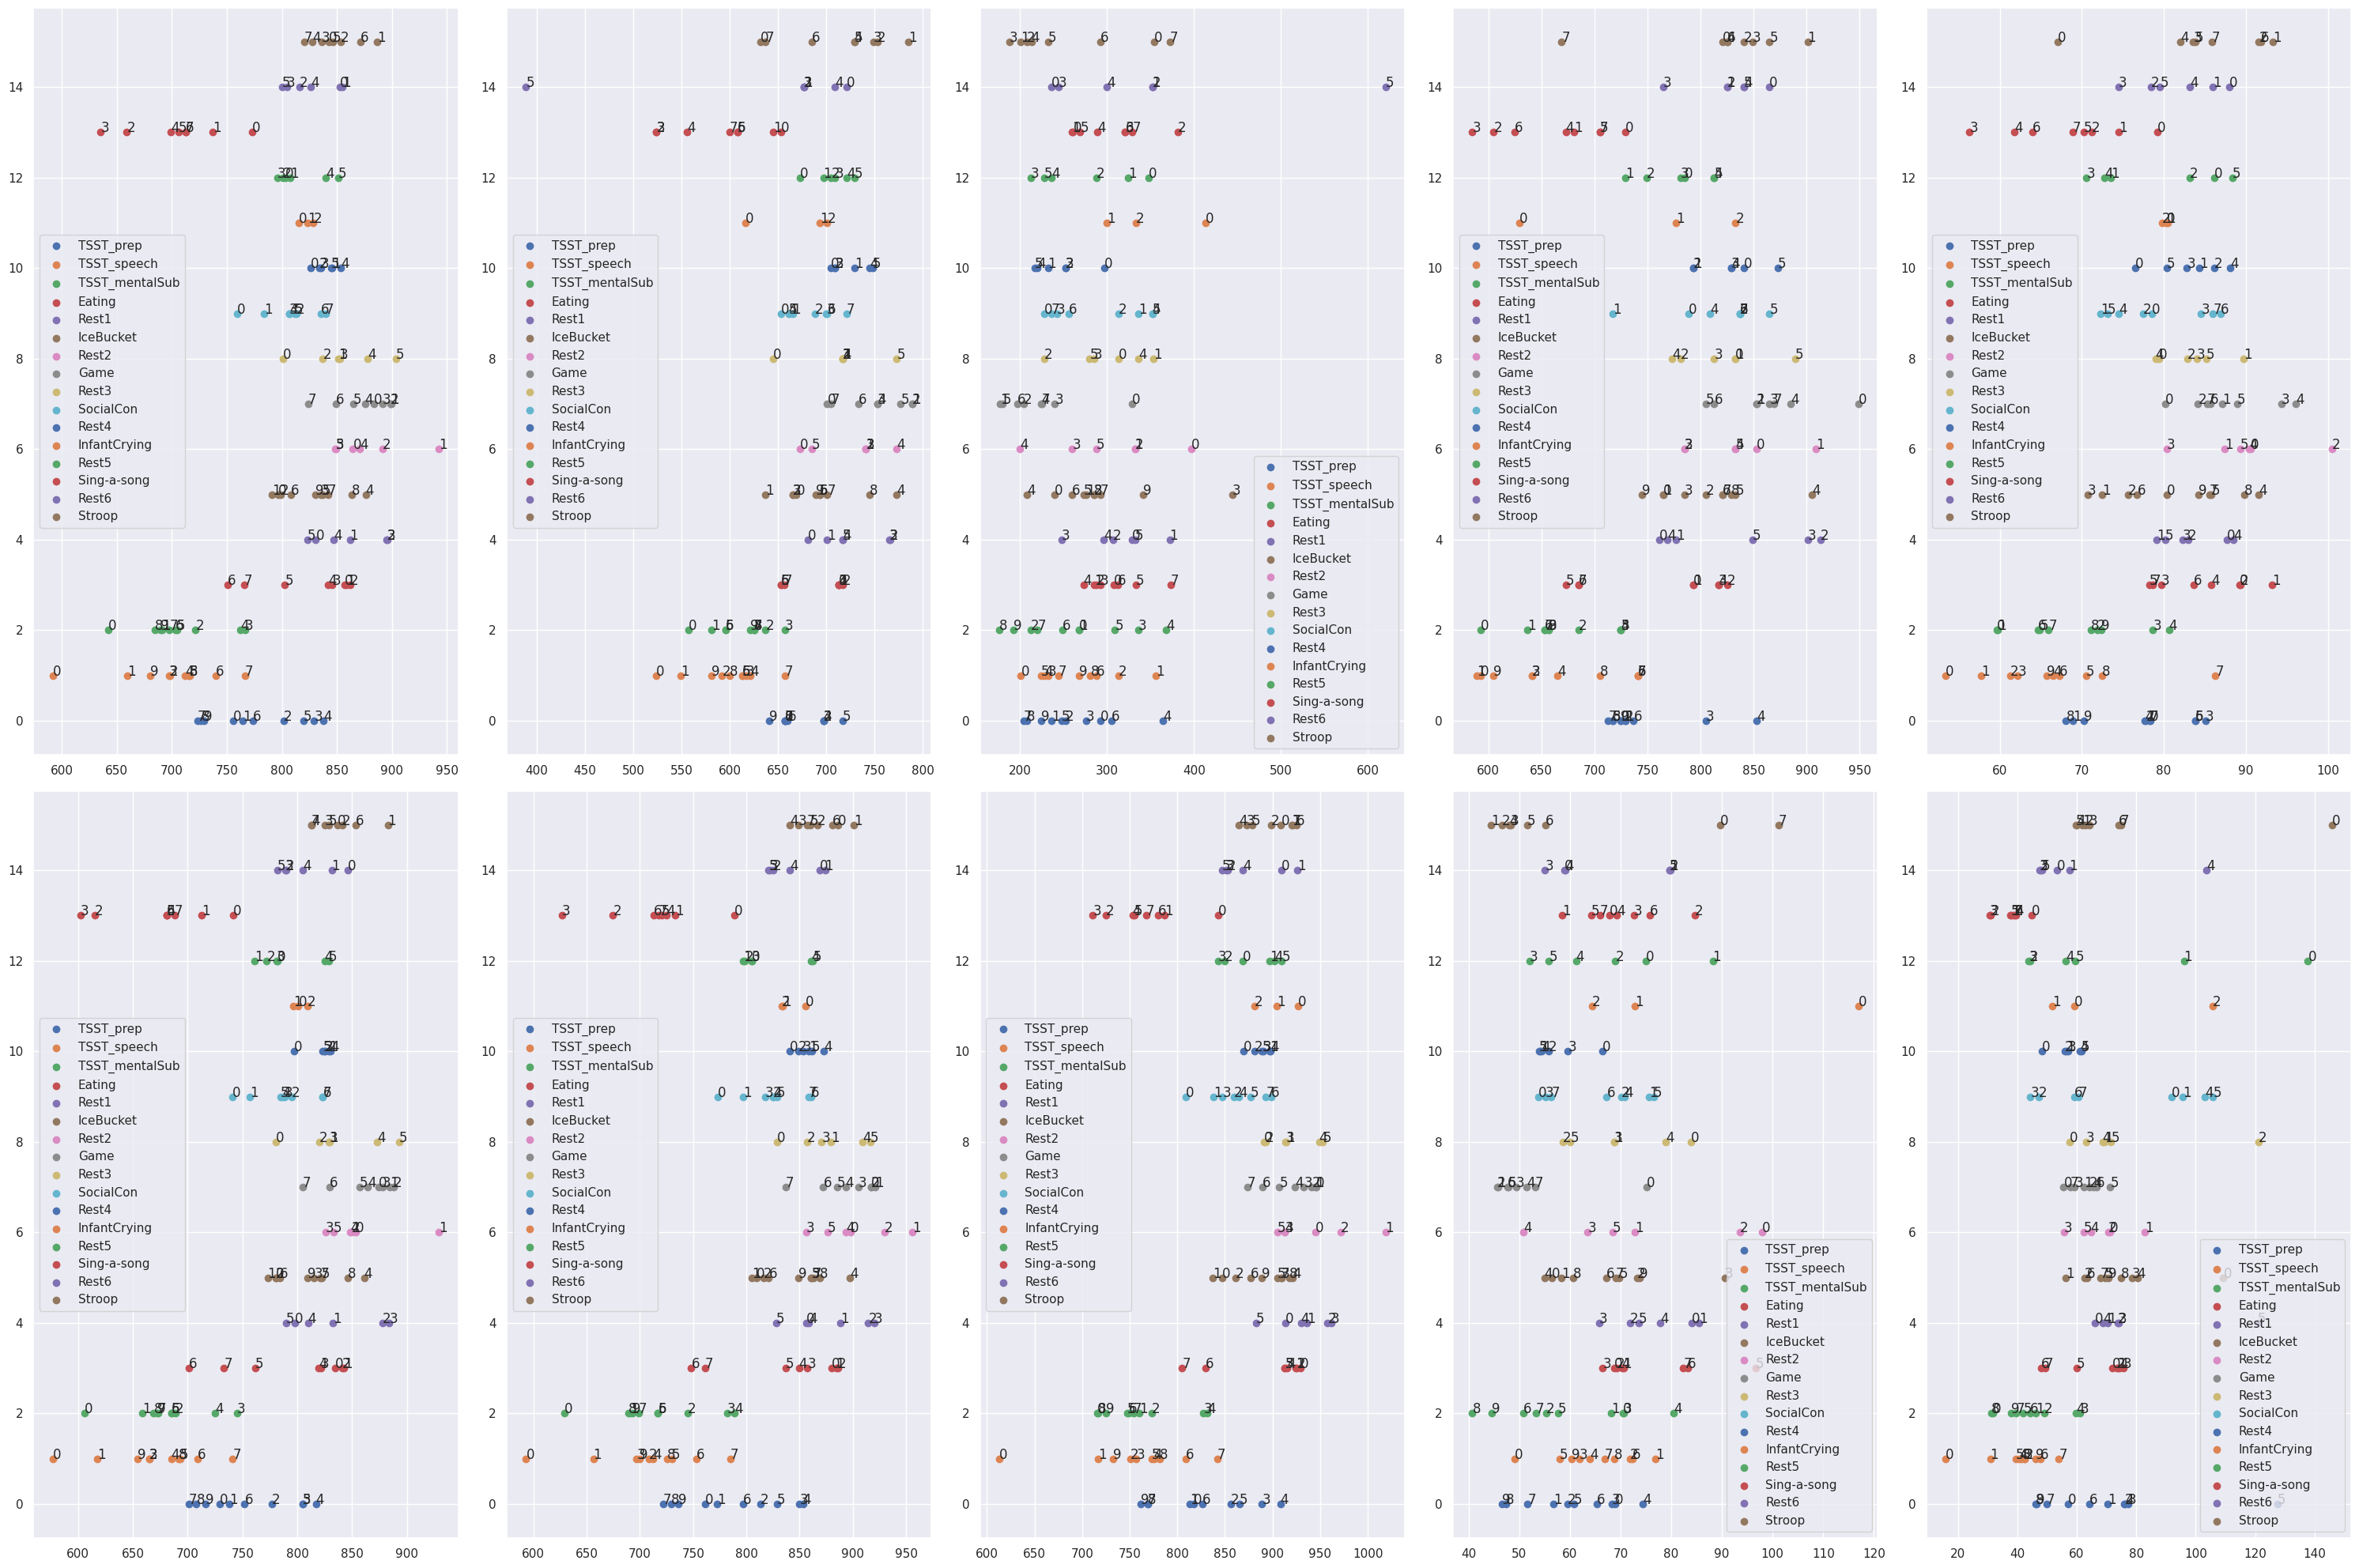

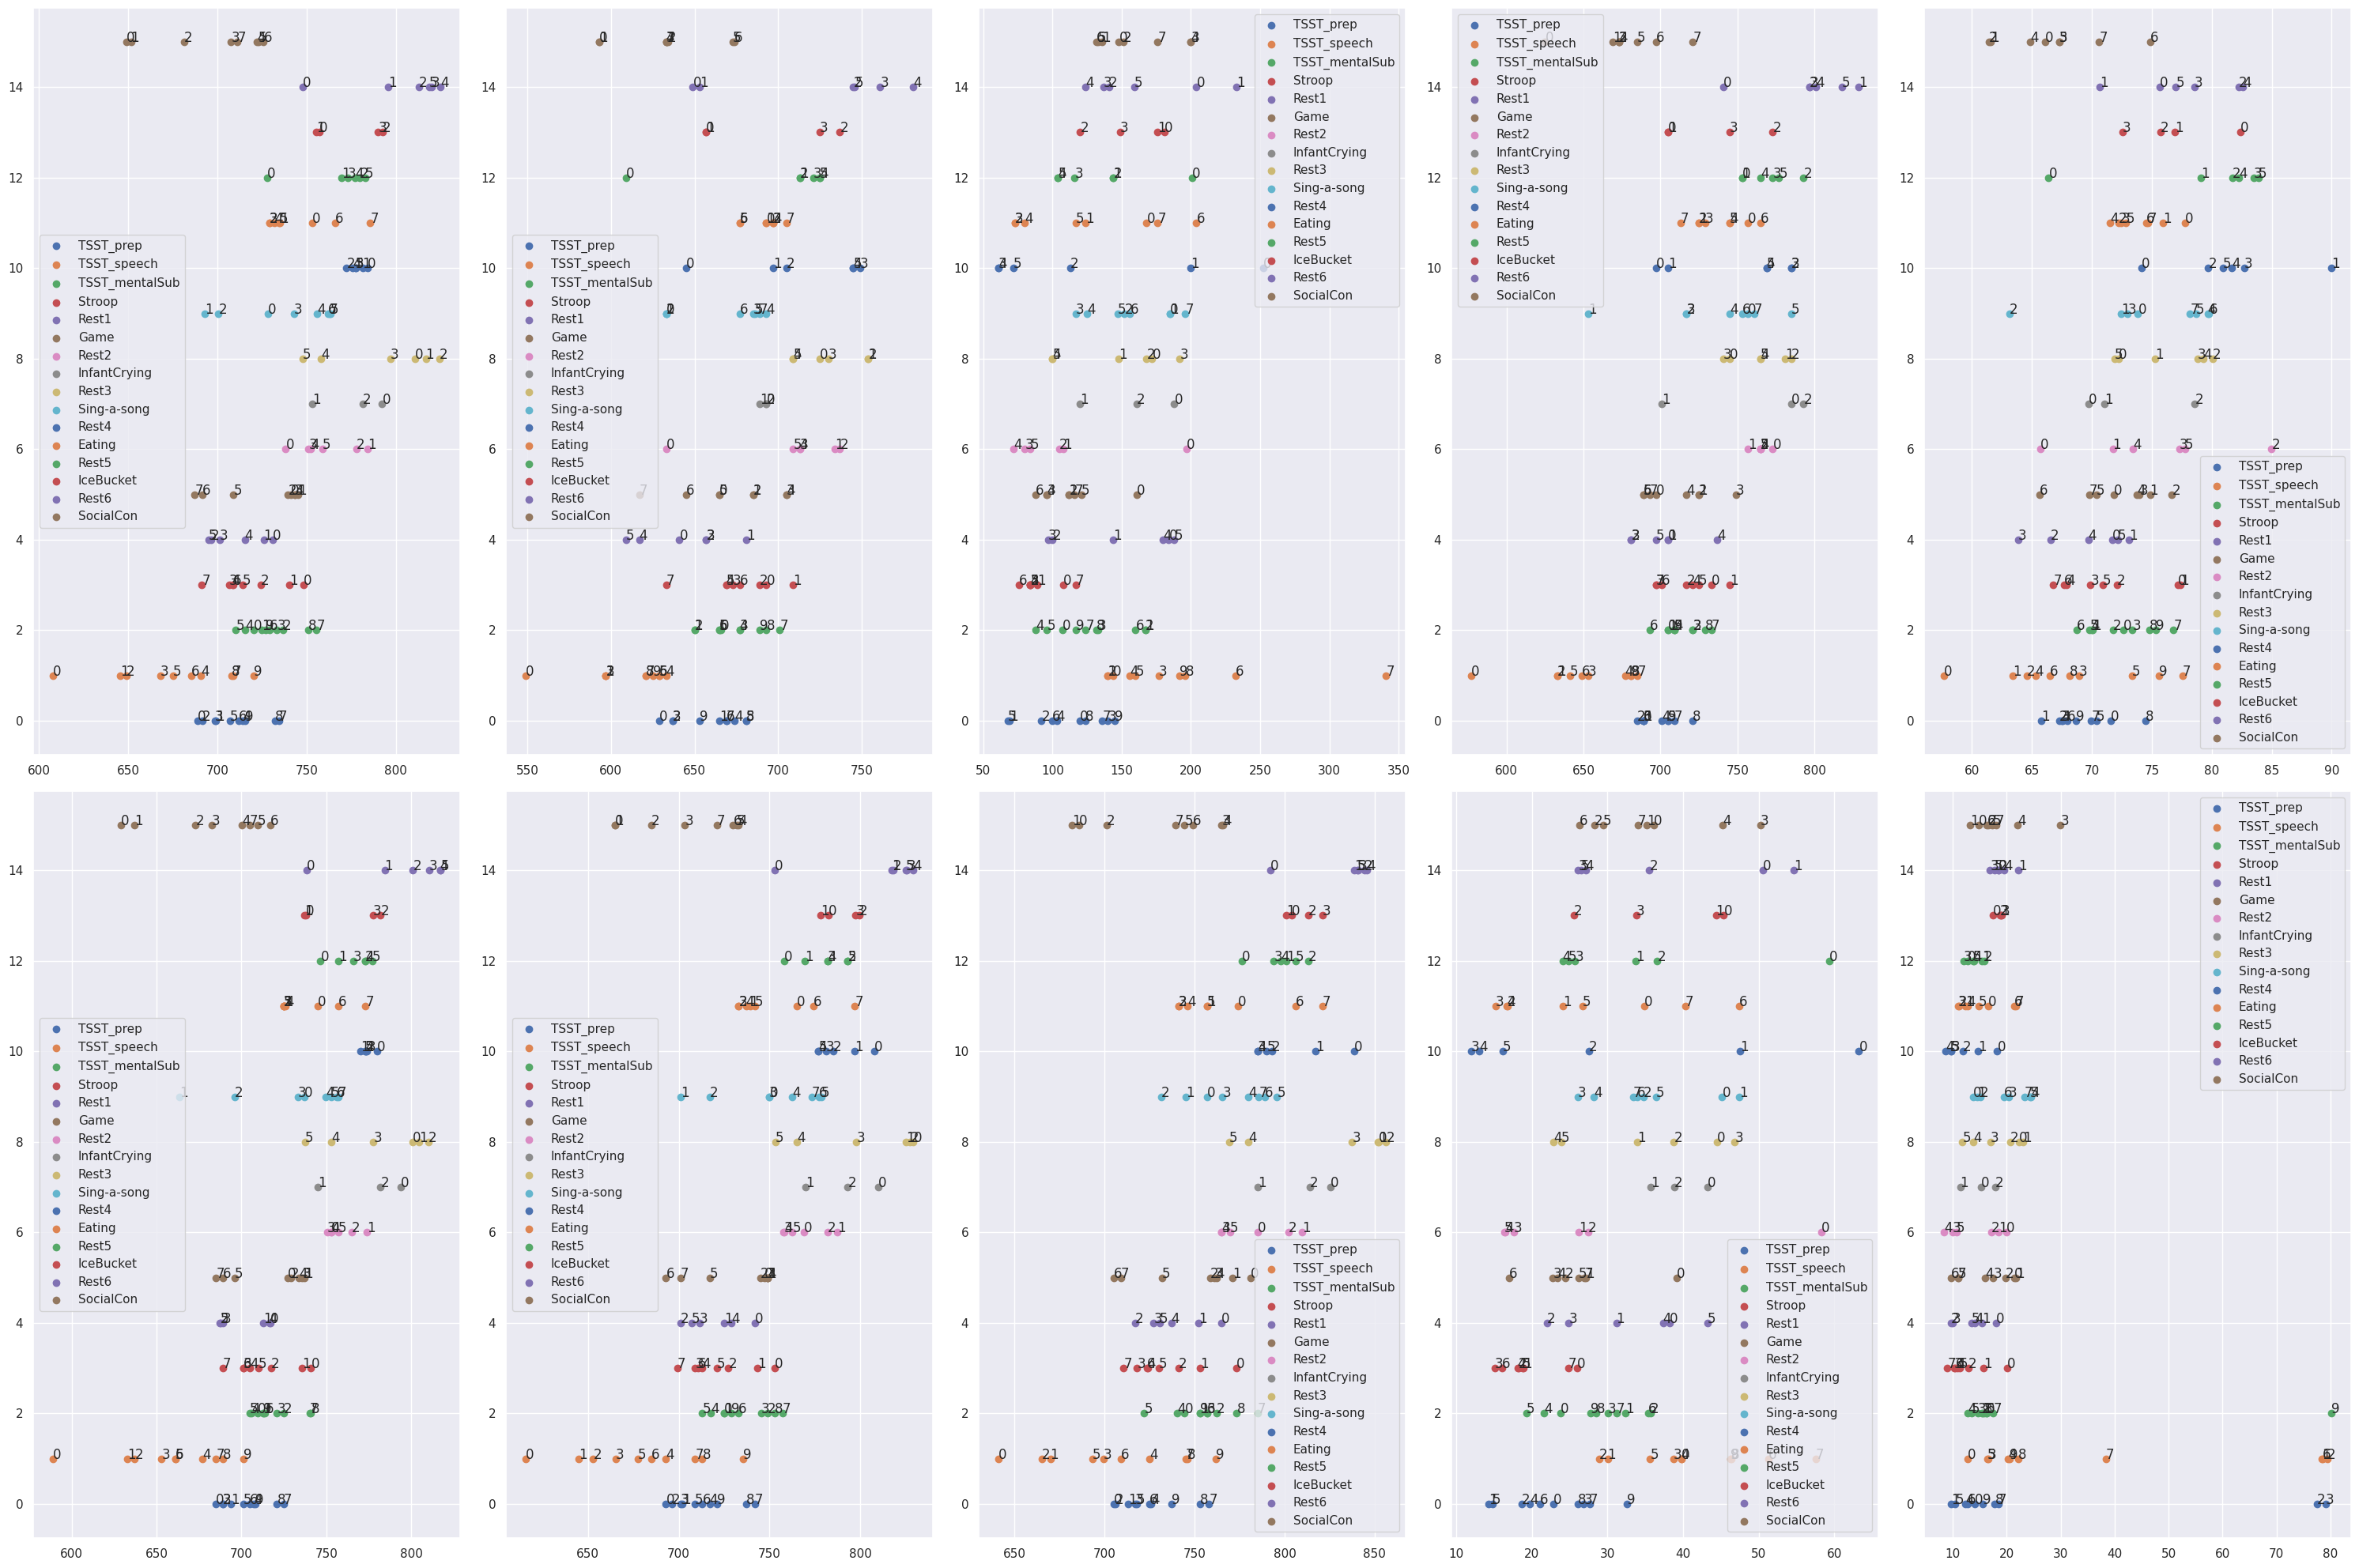

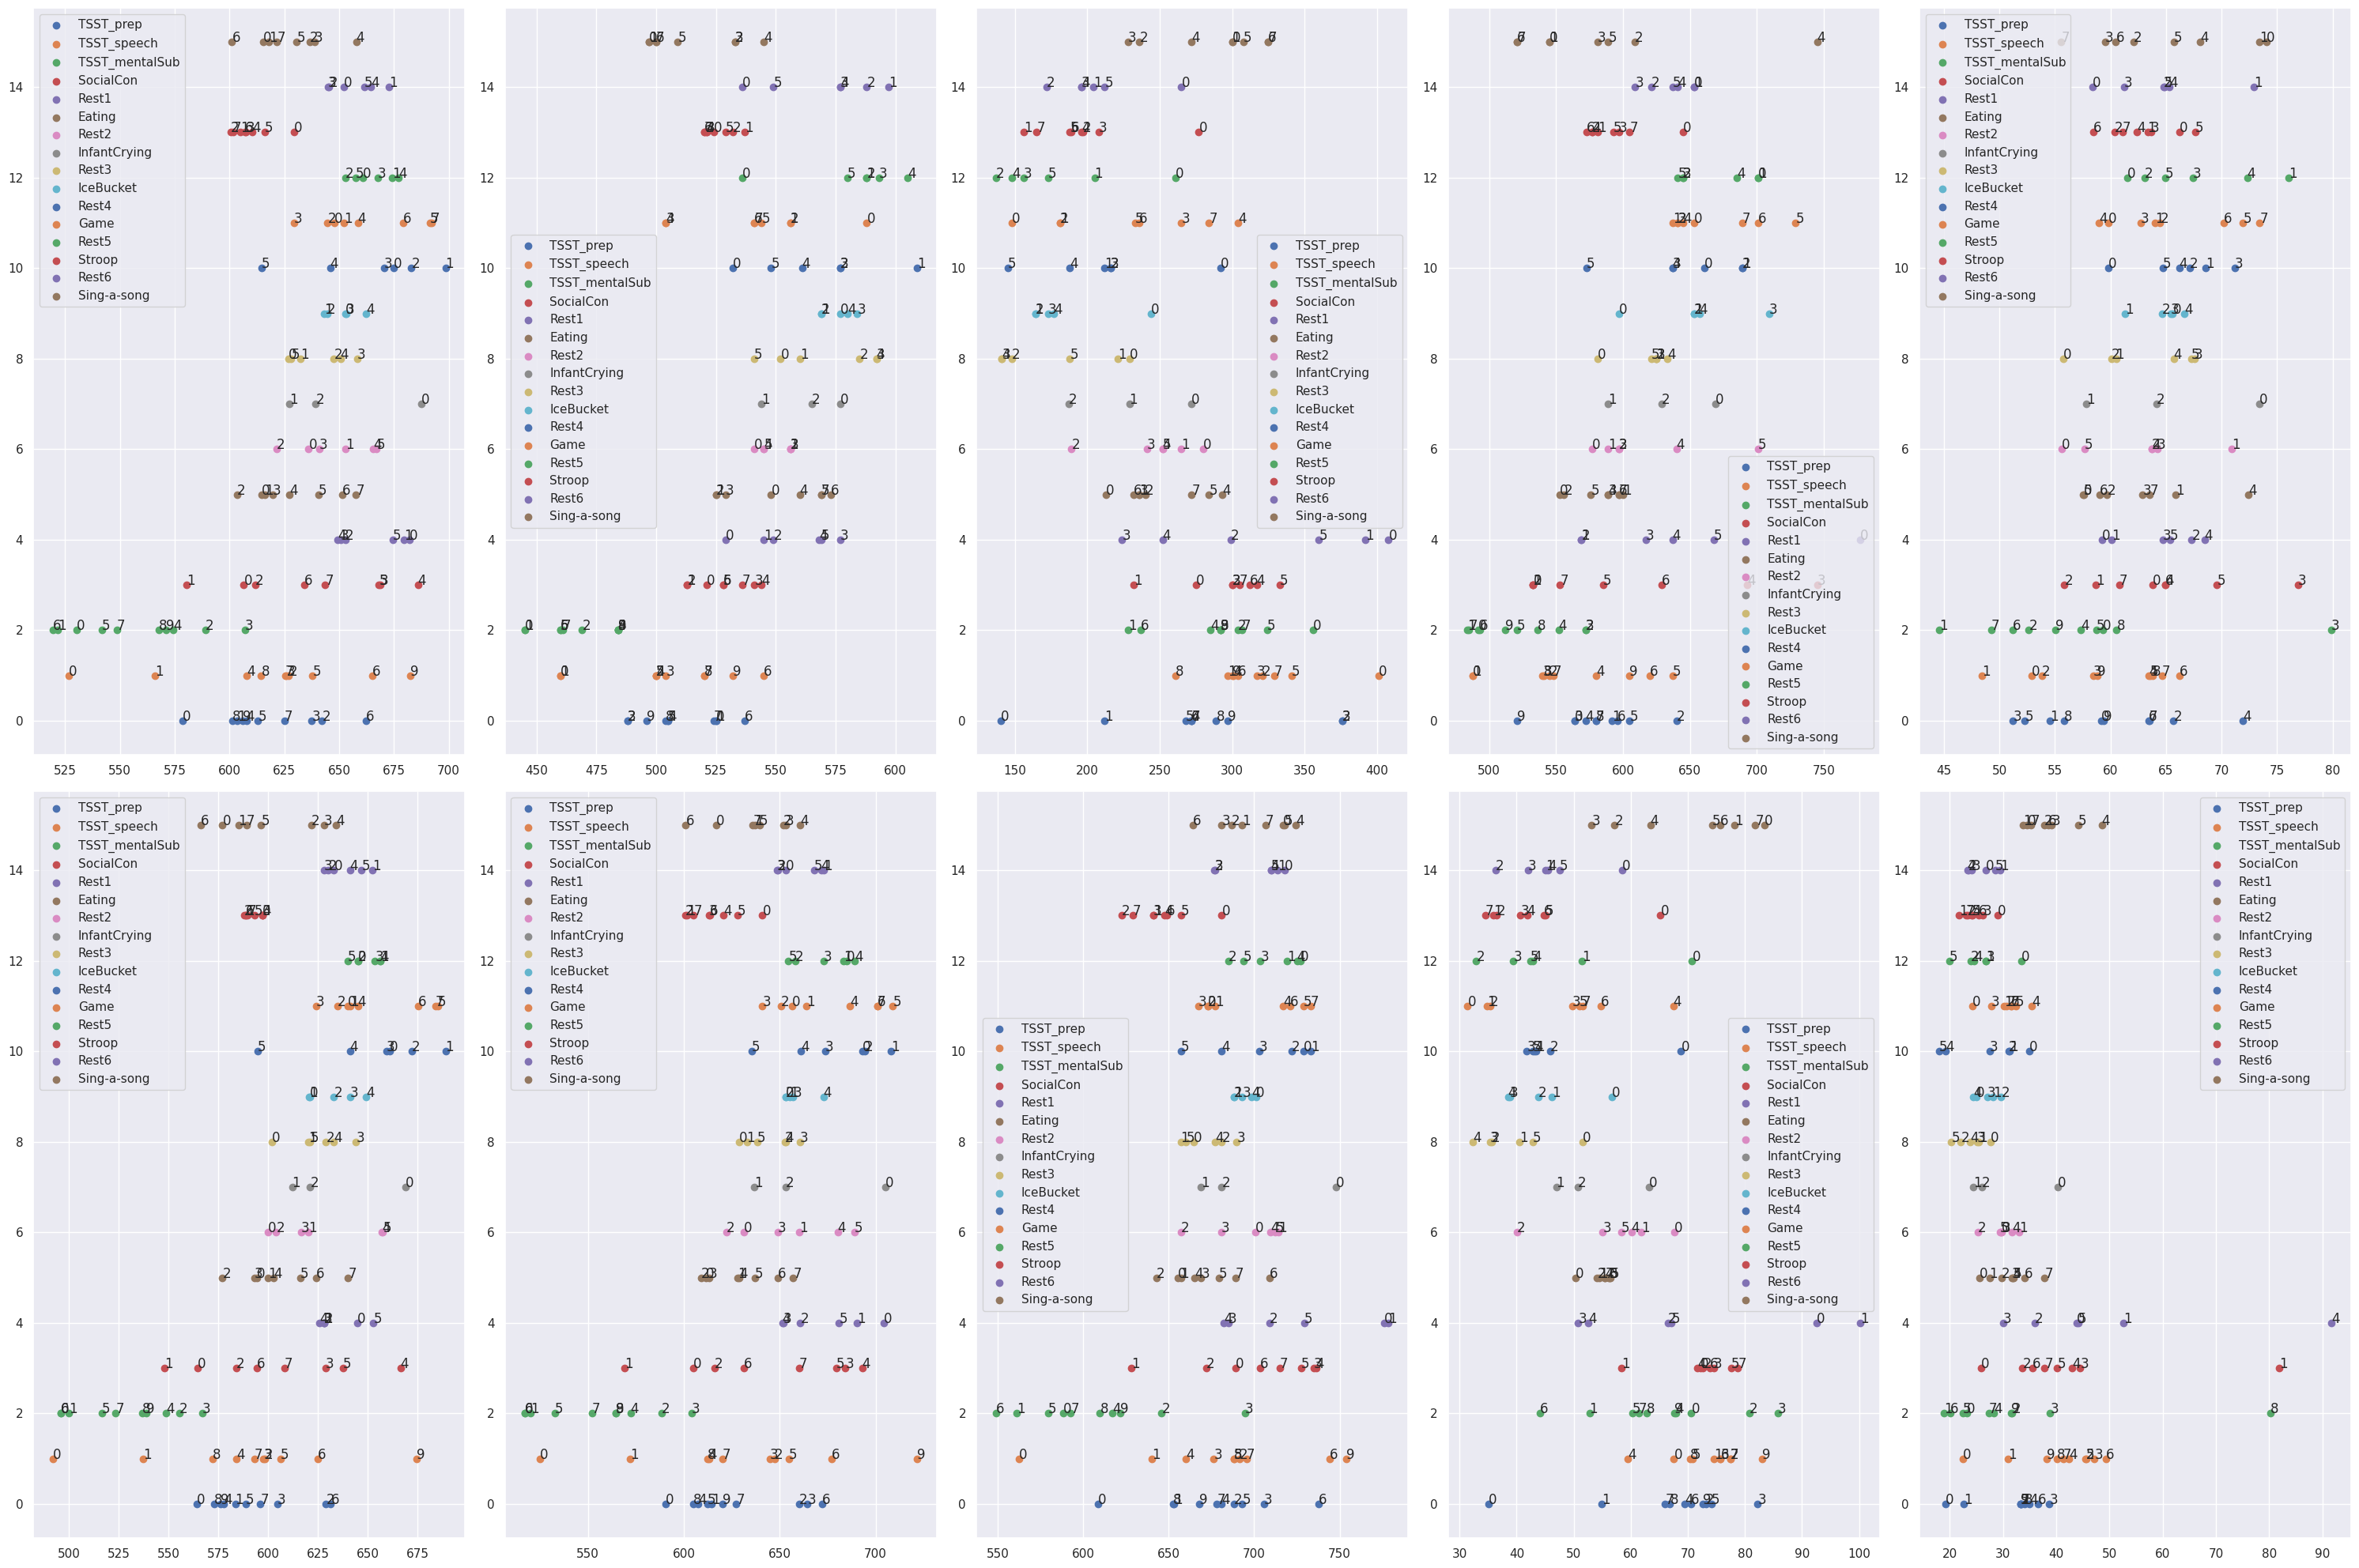

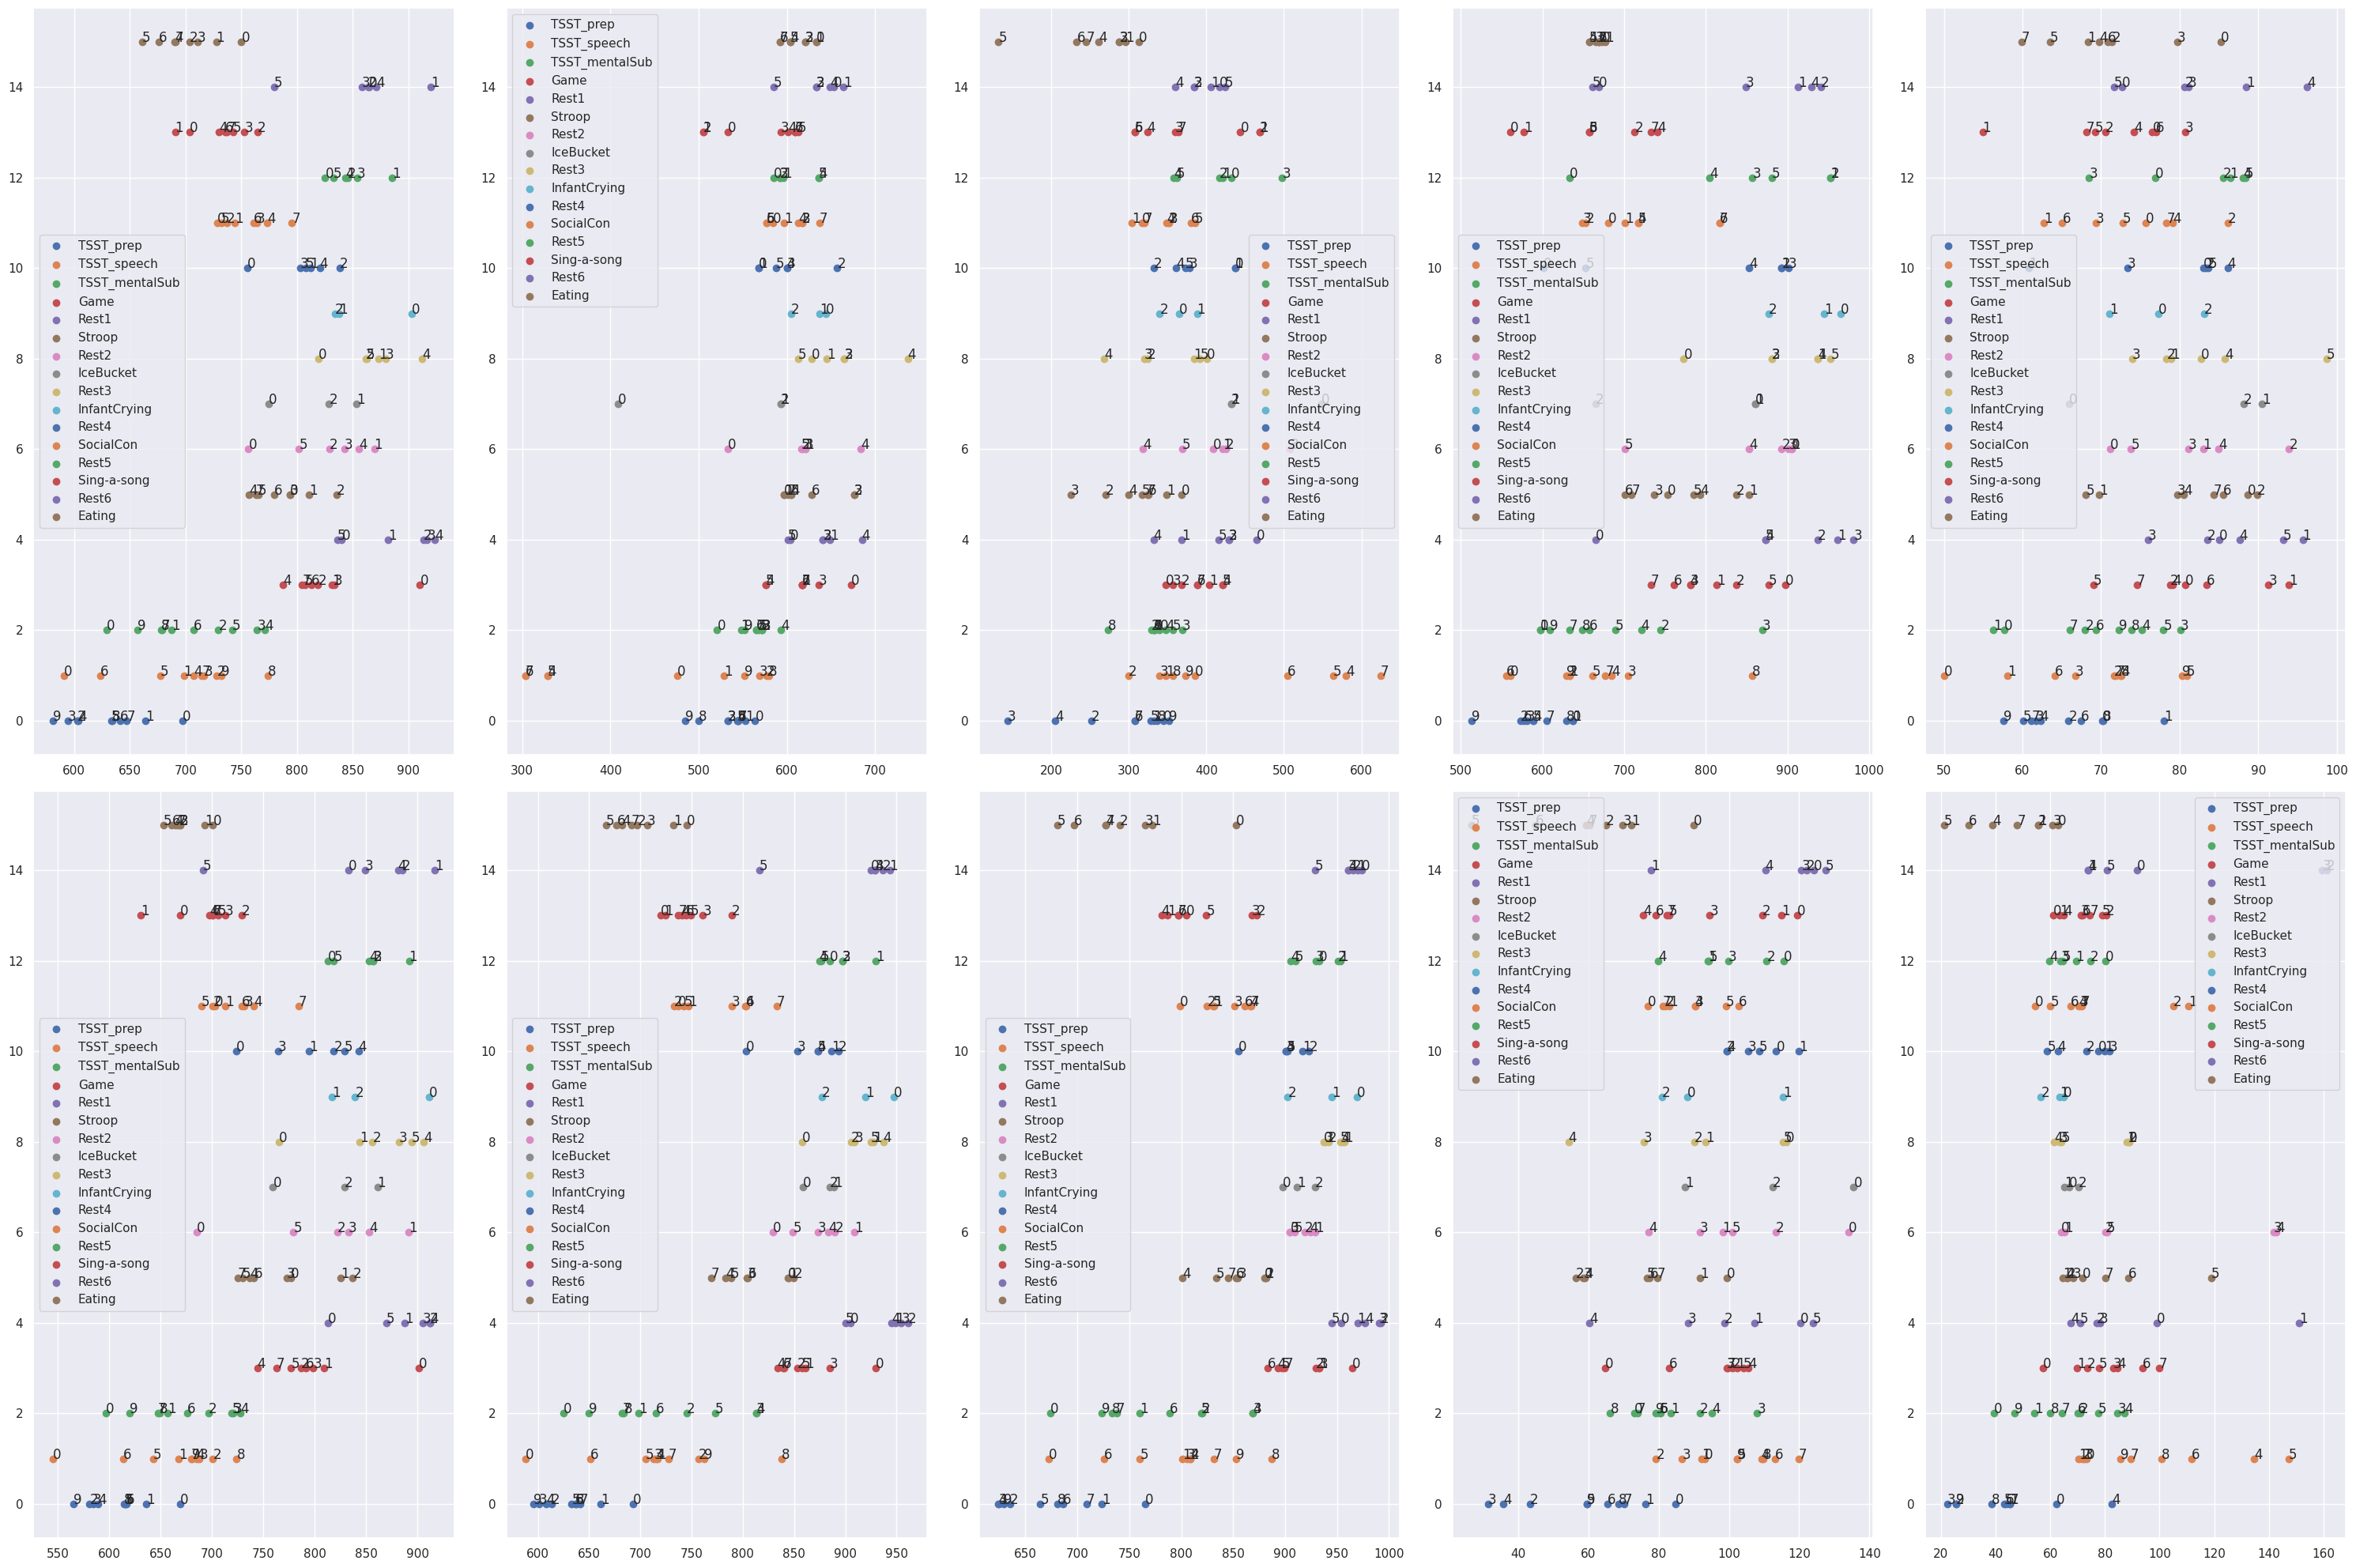

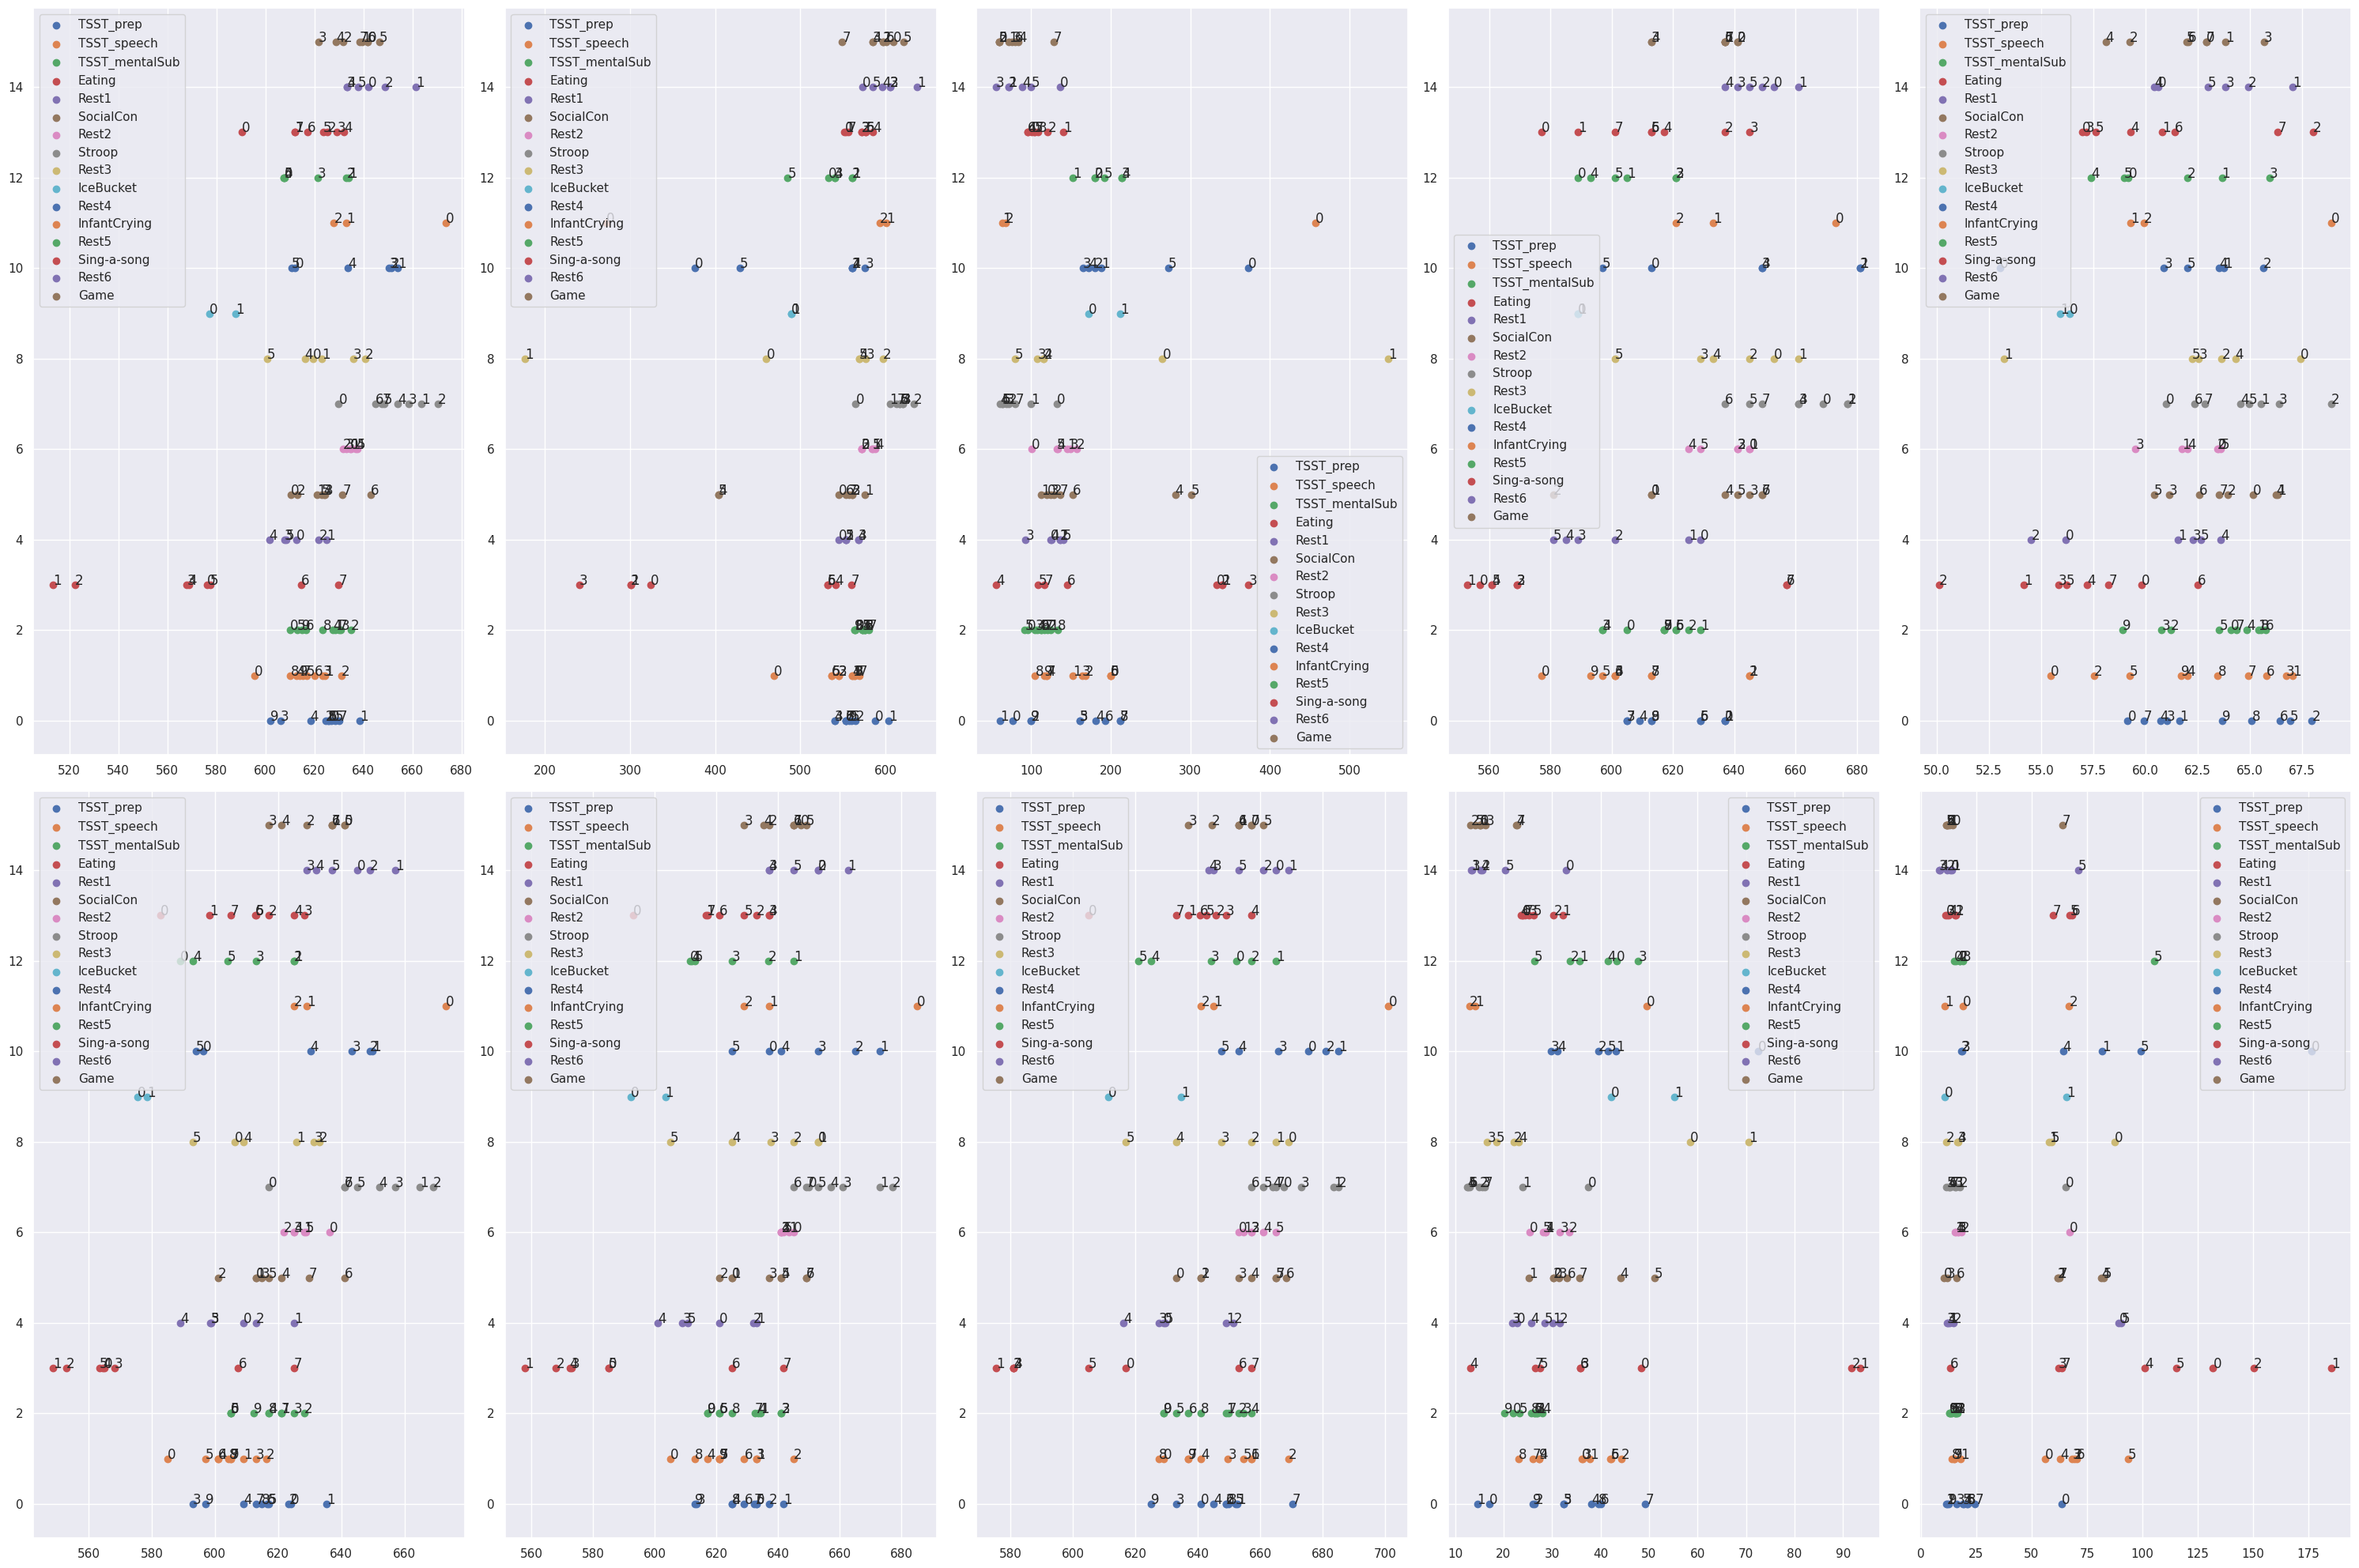

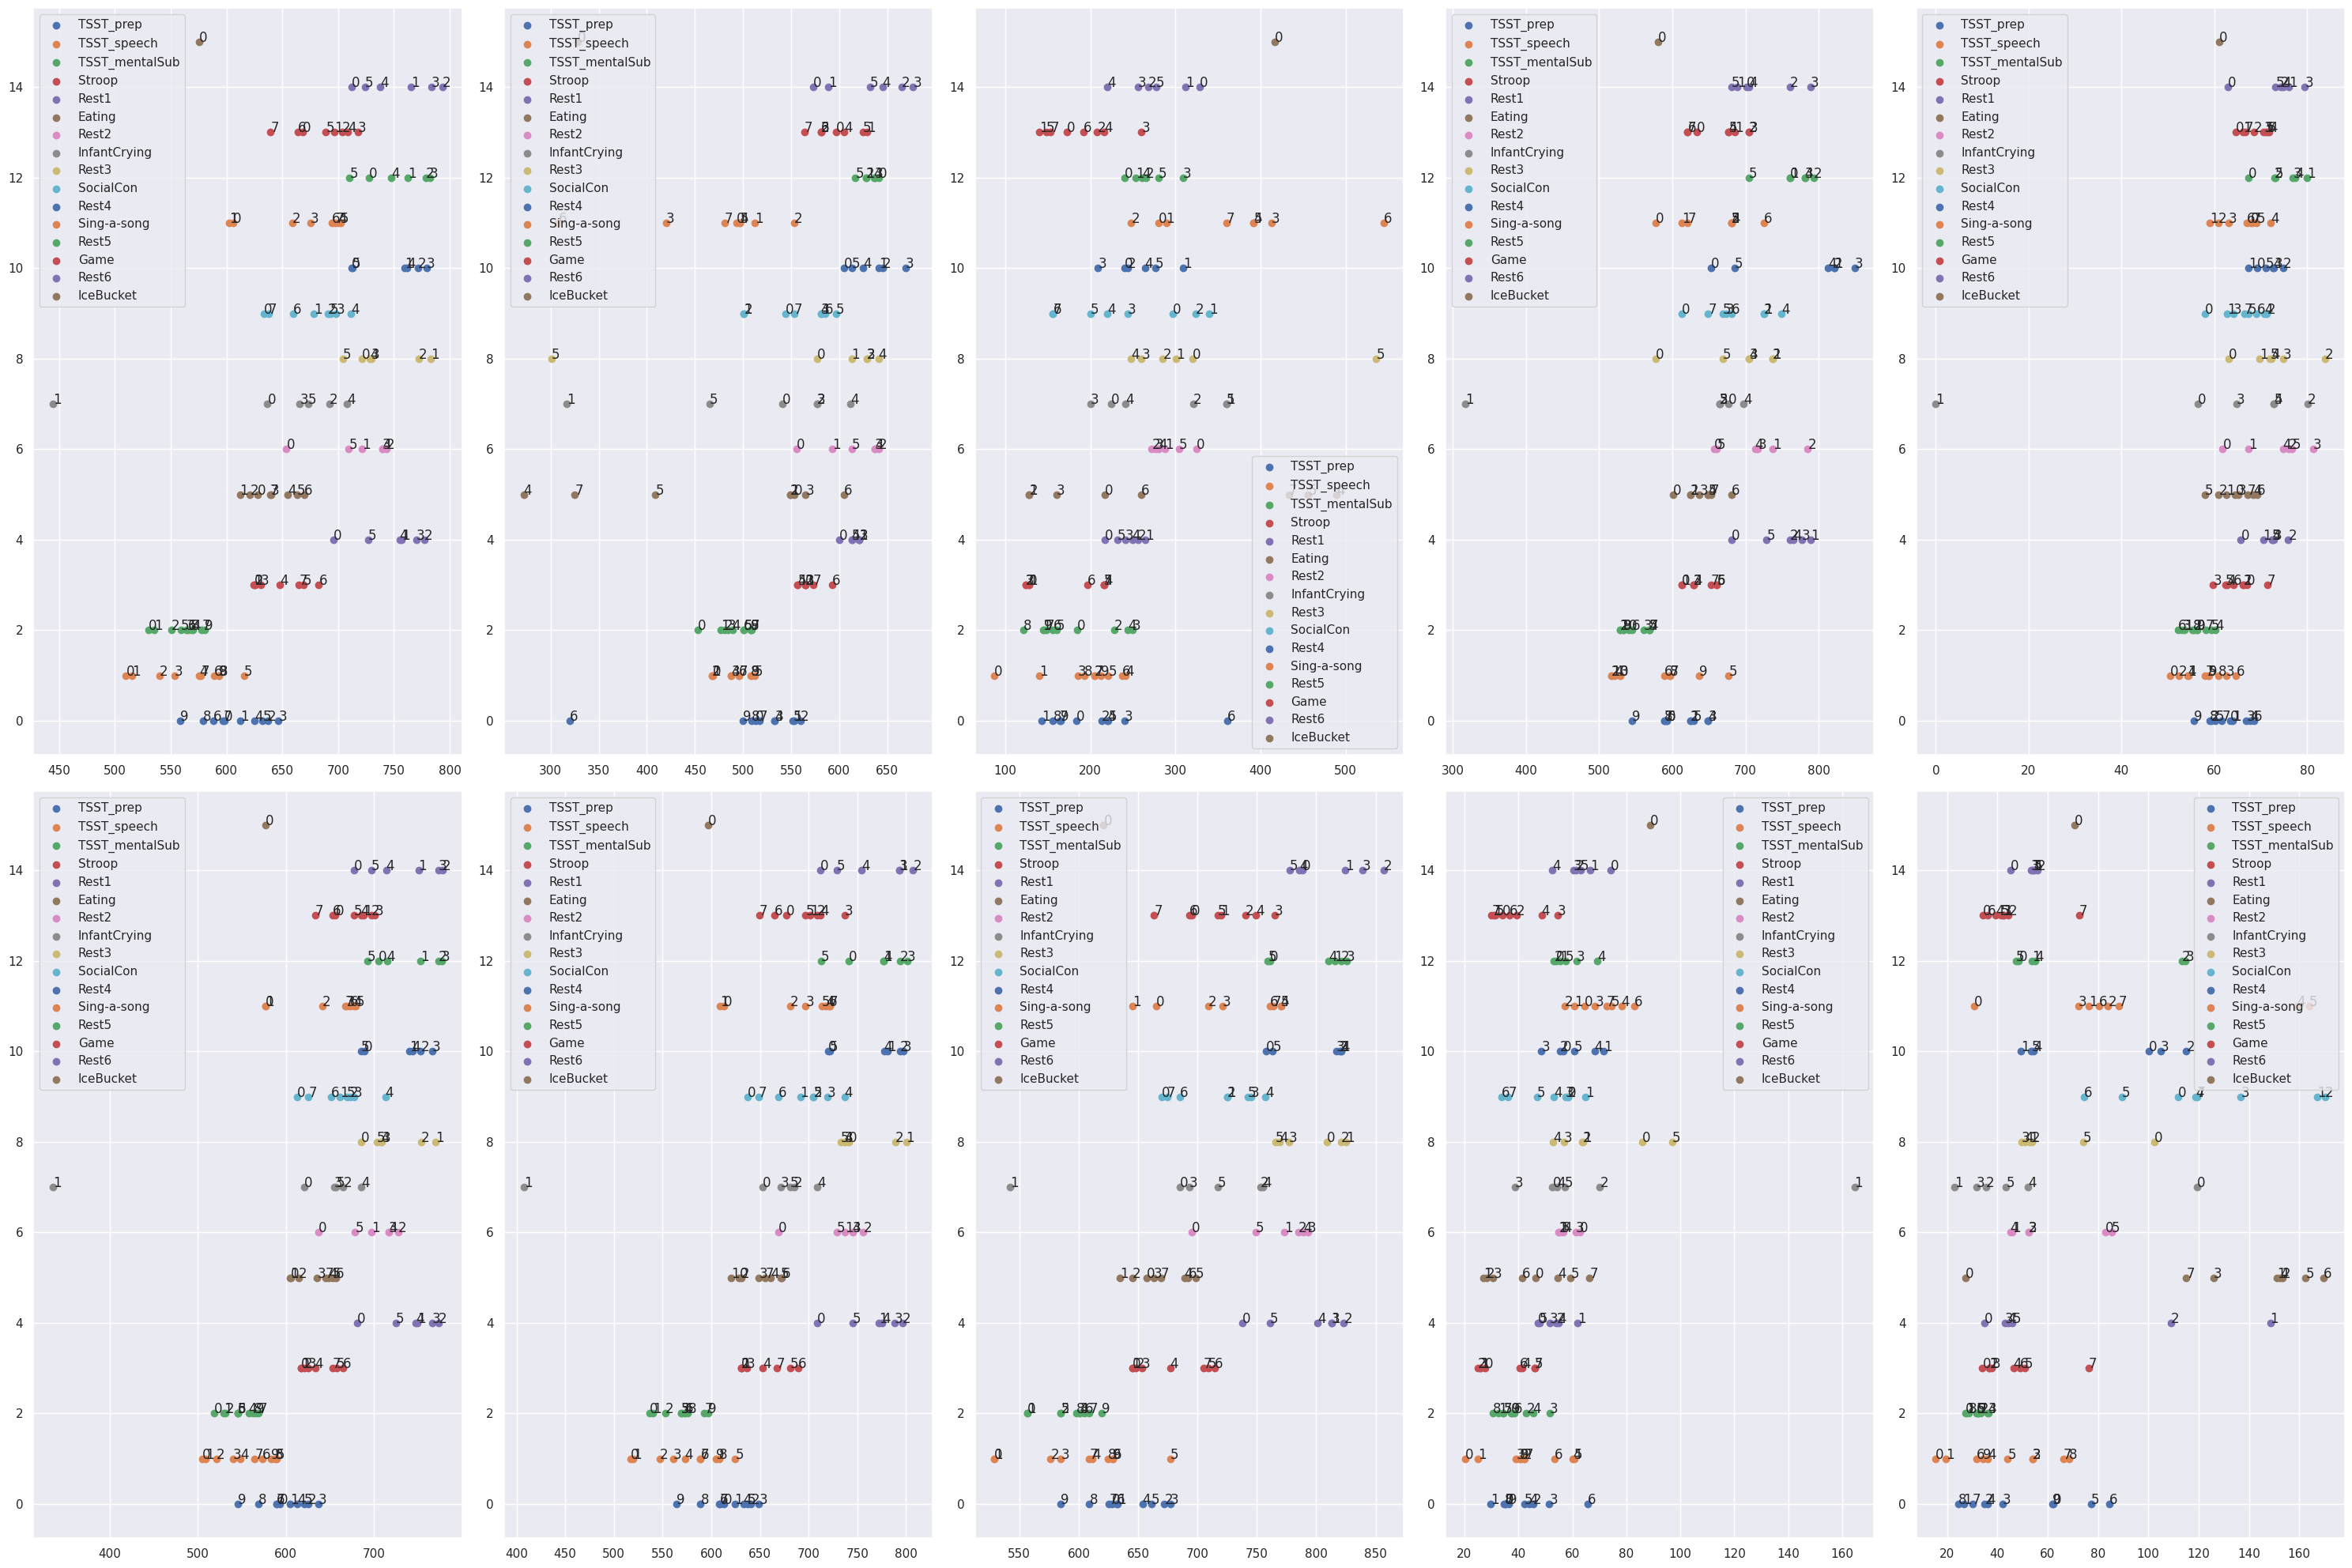

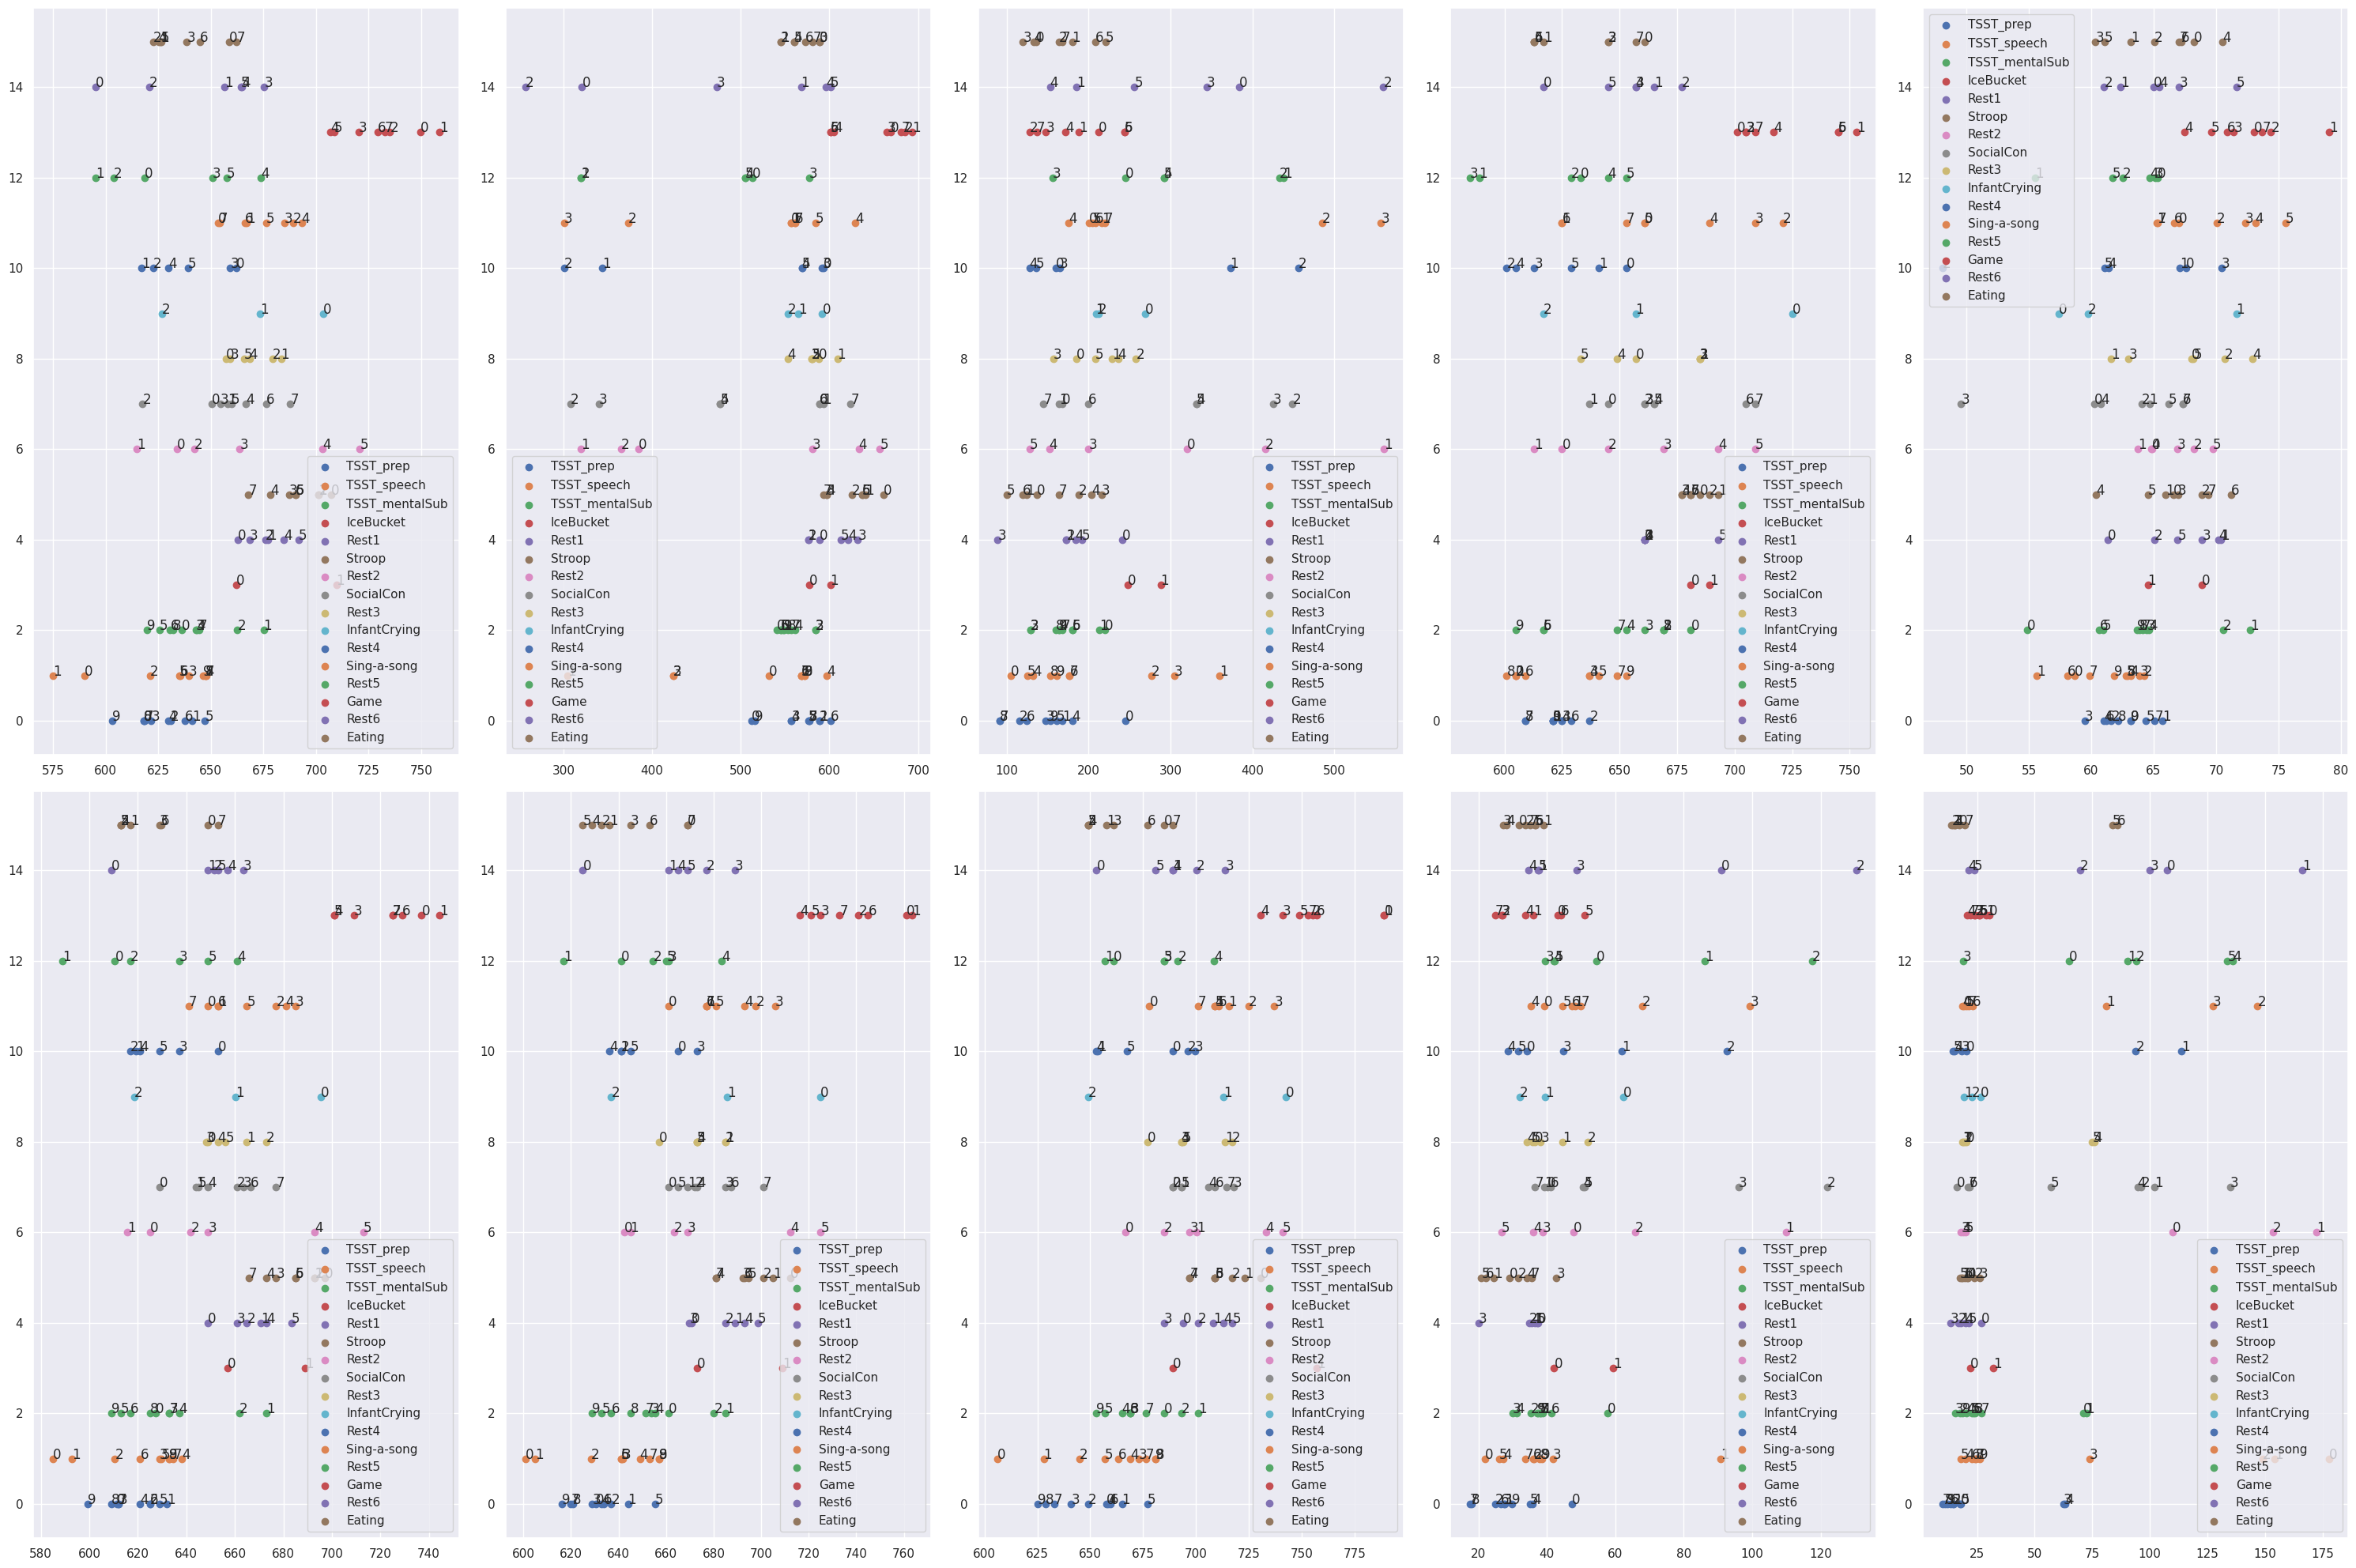

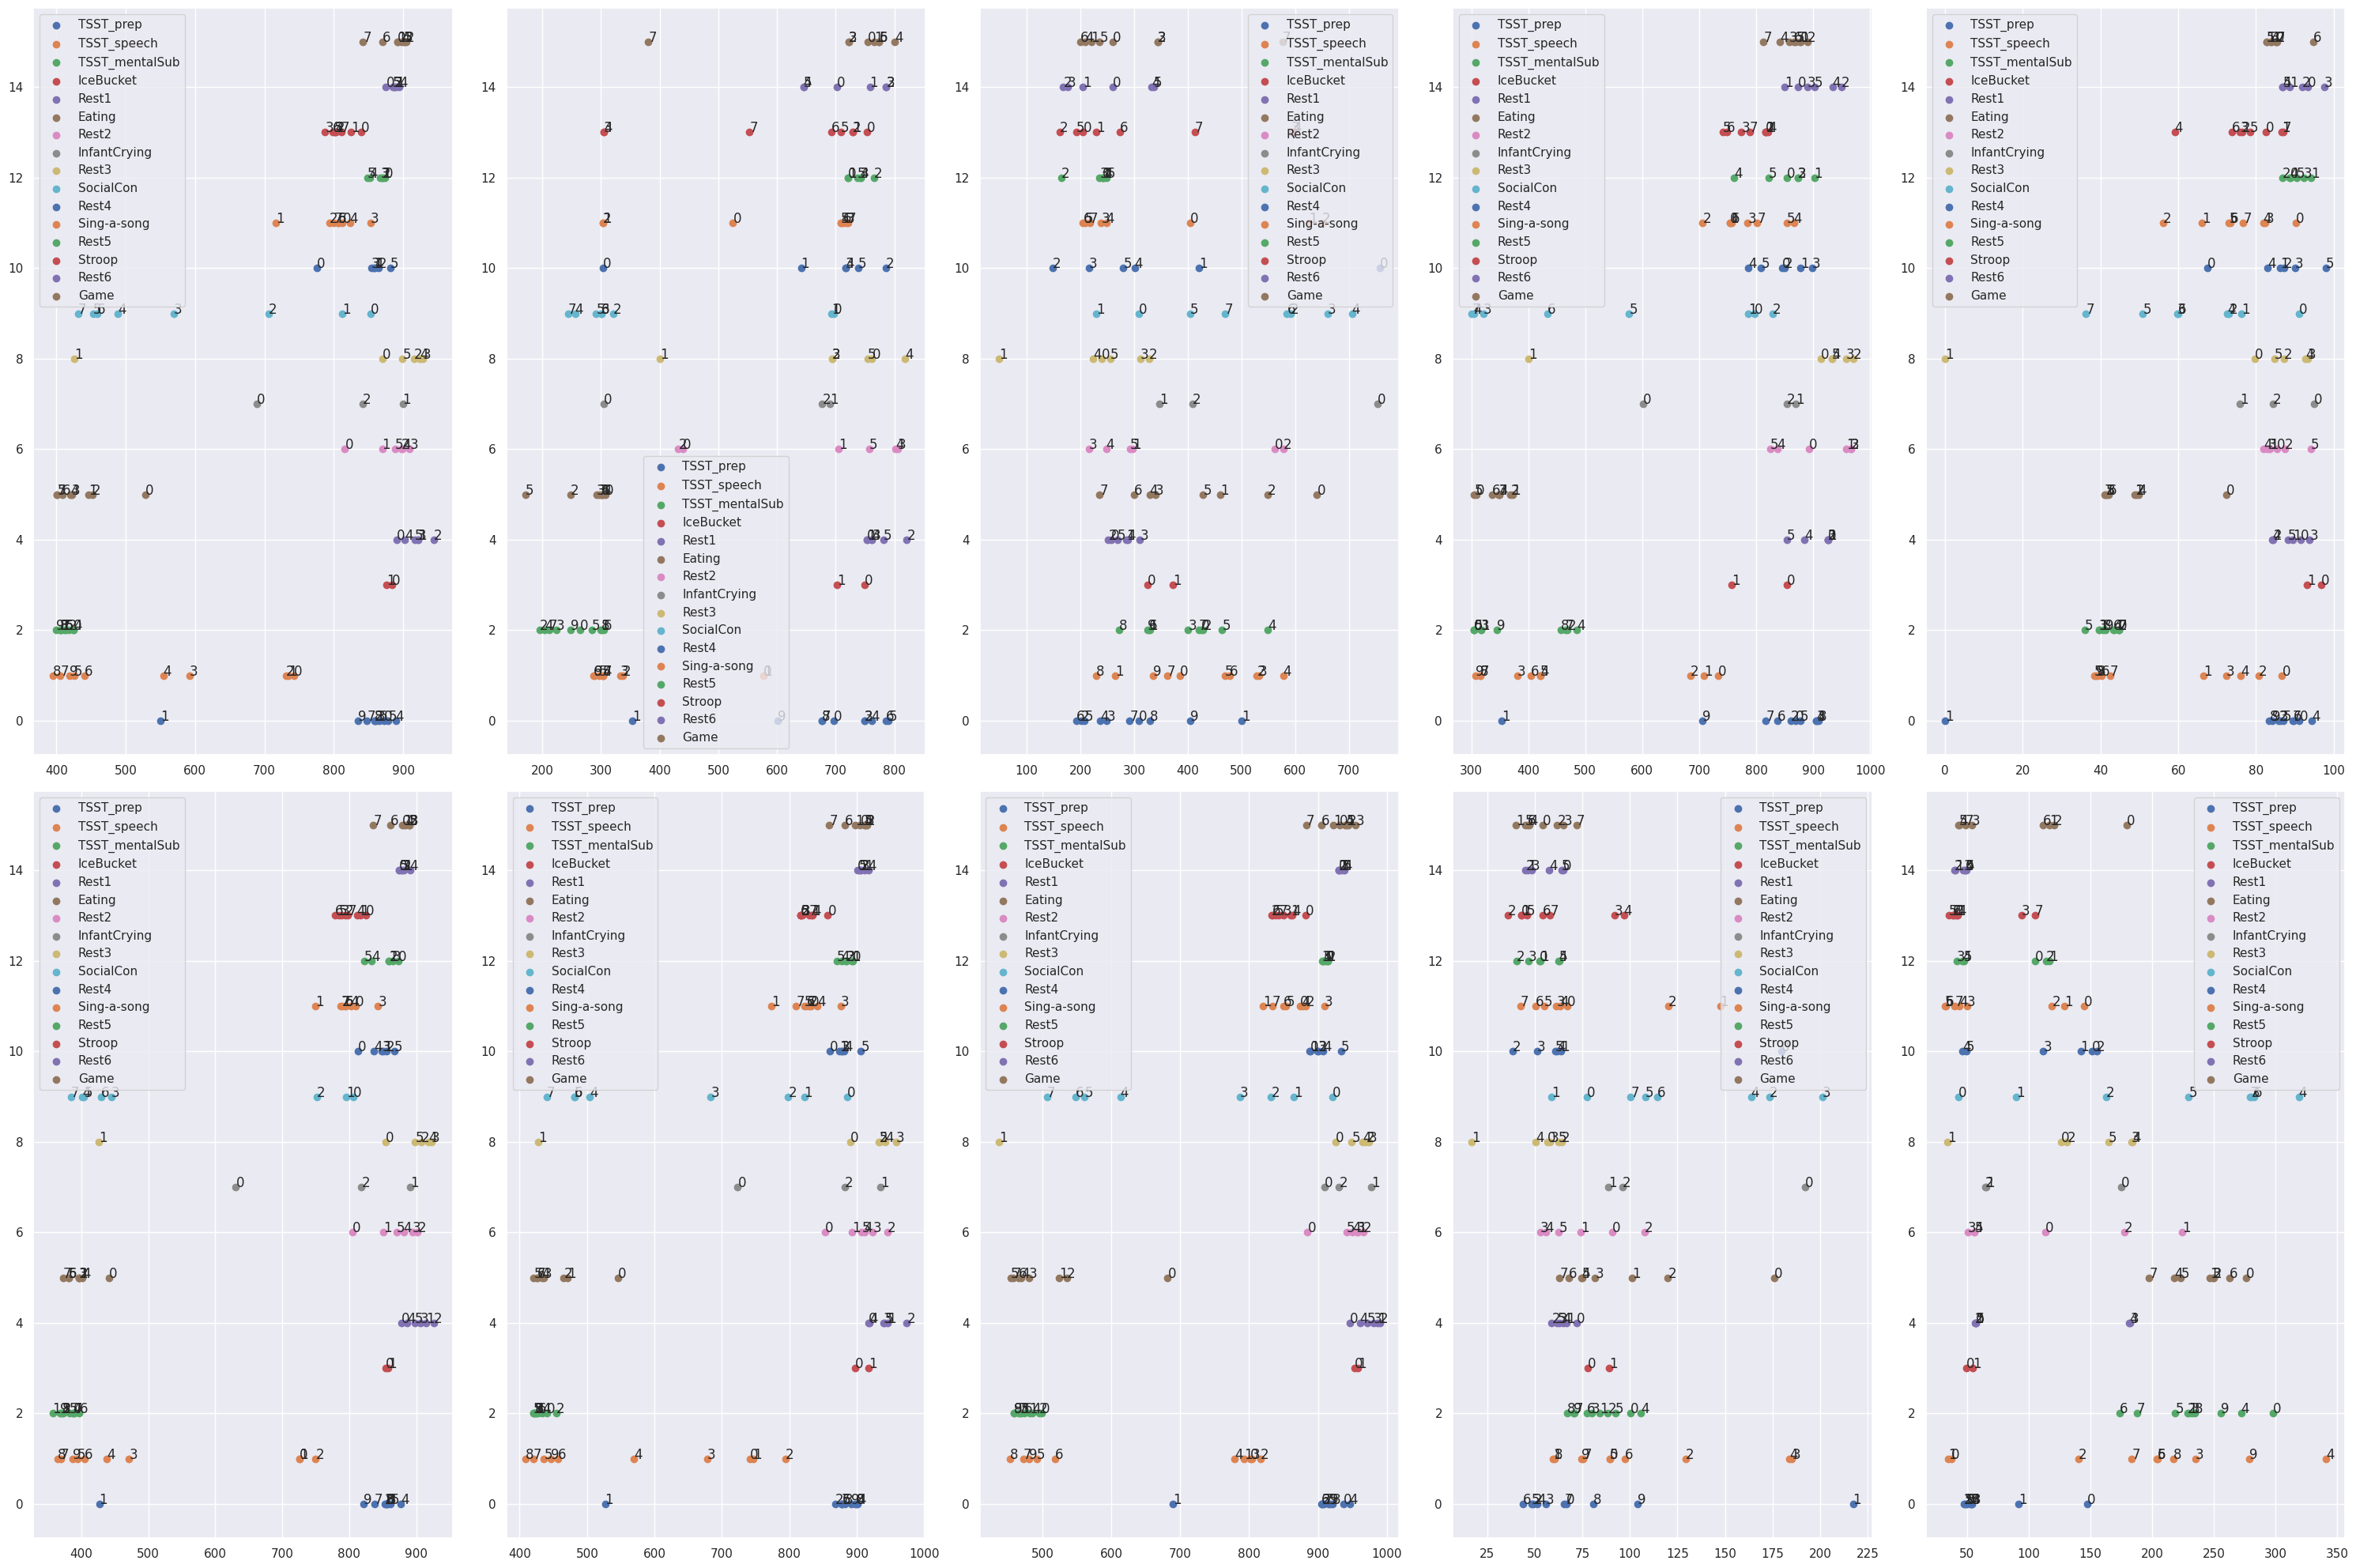

In [19]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

good_features = ['mean', 'min', 'range', 'mode', 'Lf', '40_percentile', '60_percentile', '80_percentile', 'standard deviation', 'RMSSD']


for person_path in paths:
    df = load_data(person_path)
    event_types = df['EventType'].unique()

    if len(good_features) != 10:
        assert "Change the figure configuration in the next line if the number of features used are not 10"
    
    fig, ax = plt.subplots(2, 5, figsize=(30, 20))
    ax = np.array(ax)
    ax = ax.flatten()
    
    for i, feature in enumerate(good_features):
        for idx, event in enumerate(event_types):
            dataX = df[df['EventType']==event][feature].to_numpy()
            ax[i].scatter(x=dataX, y=[idx]*dataX.size, label=event)
            for pt_num, d in enumerate(dataX):
                ax[i].annotate(f'{pt_num}', (d, idx))
        ax[i].legend()
    fig.tight_layout()
    plt.savefig(f'./Plots/Feature_Plots_1min/{person_path.split("/")[-1]}.png')
    plt.show()

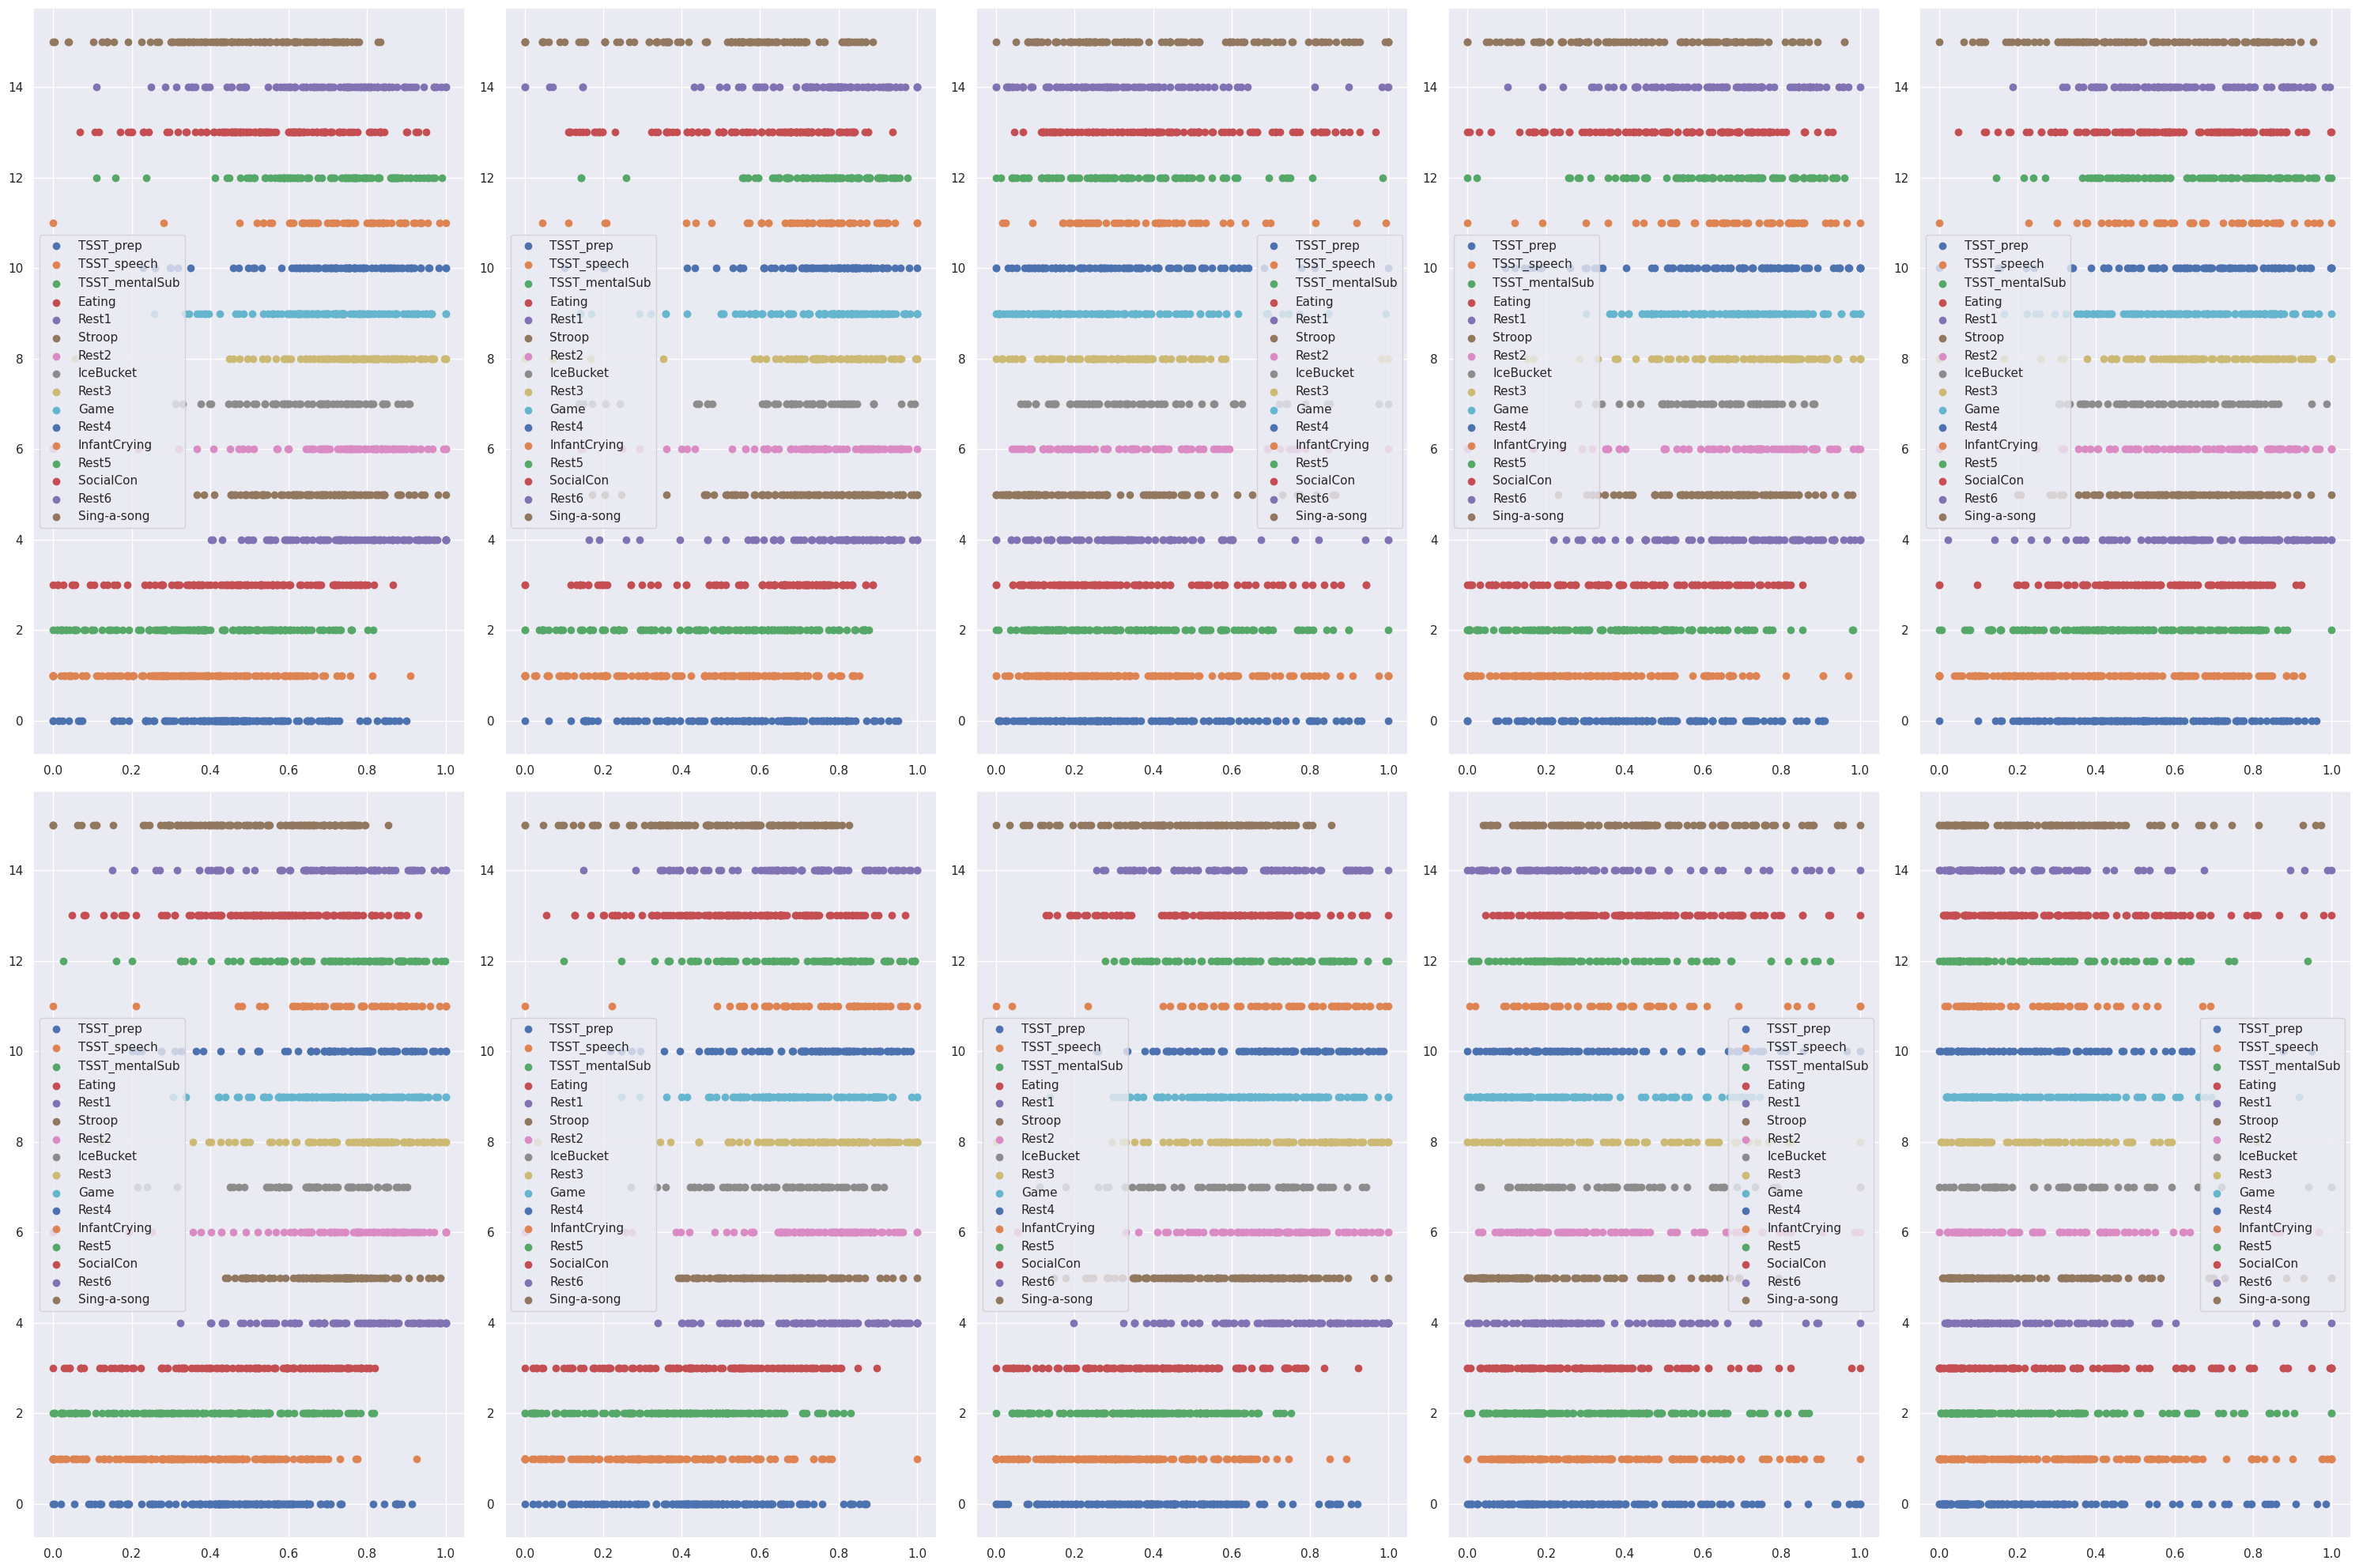

In [18]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

good_features = ['mean', 'min', 'range', 'mode', 'Lf', '40_percentile', '60_percentile', '80_percentile', 'standard deviation', 'RMSSD']


data = []

for person_path in paths:
    df = load_data(person_path)
    event_types = df['EventType'].unique()
    
    if len(good_features) != 10:
        assert "Change the figure configuration in the next line if the number of features used are not 10"
    
    dataX = df[good_features]
    dataX -= dataX.min()
    dataX /= dataX.max()
    df[good_features] = dataX
    data.append(df)
df = pd.concat(data)

event_types = df['EventType'].unique()


fig, ax = plt.subplots(2, 5, figsize=(30, 20))
ax = np.array(ax)
ax = ax.flatten()

for i, feature in enumerate(good_features):
    for idx, event in enumerate(event_types):            
        dataX = df[df['EventType']==event][feature]
        ax[i].scatter(x=dataX, y=[idx]*dataX.size, label=event)
    ax[i].legend()
    fig.tight_layout()
plt.savefig(f'./Plots/Feature_Plots_1min//overall.png')
plt.show()
